In [8]:
import pandas as pd
import numpy as np


# Step 0 : Establishing Connection with SSMS

# Step 1 : Gathering Data

In [9]:
df = pd.read_csv('Restaurant_and_Market_Health_Inspections_VF.csv')
df.head()


,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,0
0,DAJ00E07B,12/29/2017 12:00:00 AM,HABITAT COFFEE SHOP,95.0,A,1.0,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,...,CA,90065,OW0178123,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,HABITAT COFFEE SHOP,ACTIVE,PR0160774,NaN
1,DAQOKRFZB,12/29/2017 12:00:00 AM,REILLY'S,NaN,A,1.0,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,...,CA,NaN,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,REILLY'S,ACTIVE,PR0193026,NaN
2,DASJI4LUR,12/29/2017 12:00:00 AM,STREET CHURROS,93.0,NaN,1.0,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,...,CA,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630.0,STREET CHURROS,ACTIVE,PR0179282,NaN
3,DA40LU5AT,12/29/2017 12:00:00 AM,TRINITI ECHO PARK,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,...,CA,90026-3227,OW0246287,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,NaN,ACTIVE,PR0201836,NaN
4,DAXV2RMYC,12/29/2017 12:00:00 AM,POLLEN,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,...,CA,90026,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,POLLEN,ACTIVE,PR0202148,NaN


In [10]:
df.describe()


,score,service_code,program_element_pe,0
count,62814.000000,62847.000000,62829.000000,0.0
mean,93.370809,7.651073,1629.476914,NaN
std,3.972517,51.149136,9.406911,NaN
min,64.000000,1.000000,1610.000000,NaN
25%,91.000000,1.000000,1631.000000,NaN
50%,94.000000,1.000000,1632.000000,NaN
75%,96.000000,1.000000,1635.000000,NaN
max,100.000000,401.000000,1641.000000,NaN


# Explaining The Data :

Checking :

In [11]:
#check for duplicate rows
df.duplicated().sum()
df.isnull().sum()

serial_number           4828
activity_date           4821
facility_name           4787
score                   4759
grade                   4722
service_code            4726
service_description     4664
employee_id             4682
facility_address        4788
facility_city           4569
facility_id             4664
facility_state          4775
facility_zip            4845
owner_id                4626
owner_name              4745
pe_description          4839
program_element_pe      4744
program_name            4722
program_status          4661
record_id               4786
0                      67573
dtype: int64

In [12]:
# Filter rows where facility_state is not 'CA' or facility_city is not 'Los Angeles'
filtered_df = df[~(df['facility_state'] == 'CA')]


# Display the filtered rows
filtered_df


,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,0
53,DAWL6GKSY,12/27/2017 12:00:00 AM,JACKY'S RESTAURANT,91.0,A,1.0,ROUTINE INSPECTION,NaN,NaN,LOS ANGELES,...,NaN,90013-1902,OW0121139,"COSIO, LIZET VIOLETA S",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,NaN,ACTIVE,PR0143305,NaN
68,DAN2EFM01,12/27/2017 12:00:00 AM,JOHNNIE'S NEW YORK PIZZA,92.0,NaN,1.0,ROUTINE INSPECTION,EE0000721,505 S FLOWER ST # B300F,LOS ANGELES,...,NaN,90070,OW0009143,"CSI RESTAURANT GROUP, INC.",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,JOHNNIE'S NEW YORK PIZZA,ACTIVE,PR0037456,NaN
92,DAB0VA0EQ,12/27/2017 12:00:00 AM,BOLT,98.0,A,1.0,ROUTINE INSPECTION,EE0000857,5648 HOLLYWOOD BLVD,LOS ANGELES,...,NaN,90028,OW0238035,BOLT BROTHERS LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635.0,BOLT,ACTIVE,PR0190755,NaN
118,DAQ6X5DOD,12/26/2017 12:00:00 AM,AA REGIONAL ADMIRAL'S CLUB,94.0,A,1.0,ROUTINE INSPECTION,EE0000122,6022 AVION DR,LOS ANGELES,...,NaN,90045,OW0125020,"AMERICAN AIRLINES, INC.",RESTAURANT (31-60) SEATS MODERATE RISK,1634.0,AA REGIONAL ADMIRAL'S CLUB,ACTIVE,NaN,NaN
124,DABMTCUH8,12/26/2017 12:00:00 AM,DELICIAS BAKERY AND SOME,93.0,A,1.0,ROUTINE INSPECTION,EE0000923,5567 N FIGUEROA ST,LOS ANGELES,...,NaN,90042,OW0227763,EMILY SANCHEZ,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,DELICIAS BAKERY AND SOME,ACTIVE,PR0178047,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67485,DAZO00BRC,05/21/2018 12:00:00 AM,DENNY'S,90.0,A,1.0,ROUTINE INSPECTION,EE0001048,1060 TIVERTON AVE,LOS ANGELES,...,NaN,90024,OW0237213,SEASIDE DINING GROUP INC.,RESTAURANT (61-150) SEATS HIGH RISK,1638.0,DENNY'S,ACTIVE,PR0189606,NaN
67486,NaN,05/15/2018 12:00:00 AM,CORONADO MARKET,94.0,A,1.0,ROUTINE INSPECTION,EE0001006,2435 W TEMPLE ST,LOS ANGELES,...,NaN,90026,OW0019456,"KIM, SAN ET AL","FOOD MKT RETAIL (2,000+ SF) HIGH RISK",1615.0,CORONADO MARKET,ACTIVE,PR0002527,NaN
67491,DAZP53WZE,05/08/2018 00:00,LITTLE CAESARS PIZZA #5763,98.0,A,NaN,ROUTINE INSPECTION,EE0000195,1601 E 103RD ST,LOS ANGELES,...,NaN,90002,OW0021931,"LITTLE CAESAR, INC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,LITTLE CAESARS PIZZA #5763,ACTIVE,NaN,NaN
67494,DAZPE70UD,05/29/2018 12:00:00 AM,THE COFFEE COMPANY,82.0,B,1.0,ROUTINE INSPECTION,EE0000733,8751 LA TIJERA BLVD,LOS ANGELES,...,NaN,90045,OW0018603,"KAZEMI, GUS",RESTAURANT (61-150) SEATS HIGH RISK,1638.0,THE COFFEE COMPANY,ACTIVE,PR0028617,NaN


Note to self : State is a redundant column and can be dropped (also bc its still CA in the other datasets as well)

In [13]:
df[df['serial_number'].isna()]


,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,0
42,NaN,12/27/2017 12:00:00 AM,SUBWAY -52105,95.0,A,1.0,ROUTINE INSPECTION,EE0000721,255 S GRAND AVE STE 101,LOS ANGELES,...,CA,90012,OW0005591,C G INVESTMENTS INC,RESTAURANT (31-60) SEATS MODERATE RISK,1634.0,SUBWAY -52105,ACTIVE,PR0017785,NaN
63,NaN,12/27/2017 12:00:00 AM,RENAISSANCE 96TH STREET BISTRO,95.0,A,1.0,ROUTINE INSPECTION,EE0000955,9620 AIRPORT BLVD,NaN,...,CA,90045,OW0039321,WSRH LAX AIRPORT LLC,RESTAURANT (151 + ) SEATS HIGH RISK,1641.0,RENAISSANCE 96TH STREET BISTRO,ACTIVE,PR0033856,NaN
77,NaN,12/27/2017 12:00:00 AM,NOODLE PLUS,98.0,A,1.0,NaN,NaN,3250 W OLYMPIC BLVD STE 309,LOS ANGELES,...,CA,90006,OW0128534,SU YOUNG KIM,NaN,1632.0,NOODLE PLUS,ACTIVE,NaN,NaN
87,NaN,12/27/2017 12:00:00 AM,LEMONADE RESTAURANT,92.0,A,1.0,ROUTINE INSPECTION,EE0000721,505 S FLOWER ST # B-15,LOS ANGELES,...,CA,90071,OW0036346,TPG PLAZA INVESTMENTS LLC,RESTAURANT (31-60) SEATS MODERATE RISK,1634.0,LEMONADE RESTAURANT,ACTIVE,PR0046463,NaN
109,NaN,12/26/2017 12:00:00 AM,CIVIL COFFEE,95.0,A,1.0,ROUTINE INSPECTION,EE0000923,5629 N FIGUEROA ST,LOS ANGELES,...,CA,90042,NaN,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,CIVIL COFFEE,ACTIVE,PR0172442,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67493,NaN,07/25/2018 12:00:00 AM,LEVEL 2 BANQUET KITCHEN-CAFE,96.0,A,1.0,NaN,EE0000721,900 W OLYMPIC BLVD,LOS ANGELES,...,CA,90015,OW0026749,"OLYMPIC & GEORGIA PTNRS, LLC",RESTAURANT (0-30) SEATS HIGH RISK,1632.0,LEVEL 2 BANQUET KITCHEN-CAFE,ACTIVE,PR0021200,NaN
67495,NaN,06/13/2018 12:00:00 AM,STARBUCKS,92.0,A,1.0,ROUTINE INSPECTION,NaN,8700 BEVERLY BLVD PL LE,LOS ANGELES,...,CA,90048,OW0033361,"SODEXO OPERATIONS, LLC",RESTAURANT (0-30) SEATS LOW RISK,1630.0,STARBUCKS,ACTIVE,PR0023418,NaN
67497,NaN,04/06/2018 00:00,SUPER DONUTS,95.0,A,1.0,ROUTINE INSPECTION,EE0000594,4162 S BROADWAY,LOS ANGELES,...,CA,90037,OW0033550,SONGKHENG SANG,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,NaN,NaN,PR0040655,NaN
67505,NaN,05/21/2018 12:00:00 AM,DRAGO CENTRO-BASEMENT STORAG,91.0,A,1.0,ROUTINE INSPECTION,EE0000721,525 S FLOWER ST STE 120,LOS ANGELES,...,CA,90071,OW0026256,NORTH PLAZA RESTAURANT PTNRS,RESTAURANT (151 + ) SEATS HIGH RISK,1641.0,DRAGO CENTRO,ACTIVE,PR0036808,NaN


In [14]:
print(df['facility_zip'].unique())  # checking zips to nchoufou ken sus wale


['90065' nan '90028' ... '90020-3836' '90013-2345' '90015-3135']


Note to self : na7i el extra caracters after the 5 first integers from facility_zip
+ after further research All LA zipcodes range between  90001 to 90899

after enforcing el conditions hethom convert it to numeric

Note concerning date : remove the 12:00 since all of them are after 12 anyway

checking where date ends

In [15]:
#i want to see if covid had anything to do with the dates in this case juste 3al faza, covid happened in 20 january of 2020 and it supposedly had a big impact on the restaurant industry so if i'm correcct there wouldnt be much data to work with after this time
# Ensure that the 'date_column' is in datetime format (replace 'date_column' with the actual column name)
df['activity_date'] = pd.to_datetime(df['activity_date'], errors='coerce')

# Filter rows where the date is after January 1st, 2020
filtered_df = df[df['activity_date'] > '2019-01-01']

# Display the filtered rows
filtered_df

#welp seems data ends in 2018 hata el covid makhlatnelouch

print("Most recent inspection:", df['activity_date'].max())
print("Oldest inspection:", df['activity_date'].min())

Most recent inspection: 2018-07-31 00:00:00


C:\Users\azizs\AppData\Local\Temp\ipykernel_35844\2332658183.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['activity_date'] = pd.to_datetime(df['activity_date'], errors='coerce')


Oldest inspection: 2015-07-01 00:00:00


In [16]:
print(df['pe_description'].unique())  # checking zips to nchoufou ken sus wale


['RESTAURANT (0-30) SEATS MODERATE RISK'
 'RESTAURANT (0-30) SEATS LOW RISK' 'RESTAURANT (0-30) SEATS HIGH RISK'
 'FOOD MKT RETAIL (2,000+ SF) LOW RISK'
 'RESTAURANT (61-150) SEATS HIGH RISK'
 'RESTAURANT (31-60) SEATS HIGH RISK' nan
 'RESTAURANT (61-150) SEATS MODERATE RISK'
 'RESTAURANT (151 + ) SEATS HIGH RISK'
 'RESTAURANT (31-60) SEATS MODERATE RISK'
 'FOOD MKT RETAIL (1-1,999 SF) HIGH RISK'
 'RESTAURANT (151 + ) SEATS MODERATE RISK'
 'FOOD MKT RETAIL (2,000+ SF) MODERATE RISK'
 'RESTAURANT (31-60) SEATS LOW RISK' 'RESTAURANT (151 + ) SEATS LOW RISK'
 'FOOD MKT RETAIL (2,000+ SF) HIGH RISK'
 'FOOD MKT RETAIL (1-1,999 SF) LOW RISK'
 'FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK'
 'RESTAURANT (61-150) SEATS LOW RISK'
 'FOOD PROCESSING WHOLESALE (2,000-5,999 SF)'
 'FOOD MKT RETAIL (25-1,999 SF) HIGH RISK'
 'LIC HTH CARE FOOD FAC (4000-9999 SF)HIGH RISK'
 'FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK' 'FOOD MARKET WHOLESALE'
 'CATERER (0-999 SQ. FT.)' 'FOOD MKT RETAIL (25-1,999 SF) LOW R

In [17]:
# Group by 'facility_name' and check if all 'address' values in each group are the same
address_mismatch = df.groupby('facility_name').filter(lambda x: x['facility_address'].nunique() > 1)

# Display the rows where facilities with the same 'facility_name' have different addresses
address_mismatch


,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,0
9,DAE1JXAWW,2017-12-29,ABC DONUTS,91.0,NaN,1.0,ROUTINE INSPECTION,EE0000923,3027 N SAN FERNANDO RD UNIT 103,LOS ANGELES,...,CA,90065,OW0026313,"NOUNG, SAING HOW",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,ABC DONUTS,NaN,PR0045001,NaN
11,DASL61OZ3,2017-12-28,EL POLLO LOCO,97.0,A,1.0,ROUTINE INSPECTION,EE0000857,5319 W SUNSET BLVD,NaN,...,CA,90027,OW0010868,"EL POLLO LOCO, INC.",RESTAURANT (31-60) SEATS HIGH RISK,1635.0,EL POLLO LOCO,ACTIVE,PR0028596,NaN
29,DA9YVUZ60,2017-12-28,NORM'S RESTAURANT,90.0,A,1.0,ROUTINE INSPECTION,EE0000951,NaN,LOS ANGELES,...,CA,90048,OW0129683,"NORM'S RESTAURANTS, LLC.",NaN,1638.0,NORM'S RESTAURANT,ACTIVE,PR0156875,NaN
35,DACQPGHLW,2017-12-28,ONO HAWAIIAN BBQ,98.0,A,NaN,ROUTINE INSPECTION,EE0000857,5539 W SUNSET BLVD,LOS ANGELES,...,CA,90028,OW0015833,"HOLLYWOOD SUNSET, LLC",RESTAURANT (31-60) SEATS HIGH RISK,1635.0,ONO HAWAIIAN BBQ,ACTIVE,PR0006530,NaN
39,DA8W0B9VW,2017-12-27,WABA GRILL,100.0,A,1.0,ROUTINE INSPECTION,NaN,7109 W SUNSET BLVD,LOS ANGELES,...,CA,NaN,OW0243472,MICHAEL & DANIEL INC,RESTAURANT (31-60) SEATS HIGH RISK,1635.0,WABA GRILL,ACTIVE,PR0197882,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67489,DAZOLZ19G,2018-05-31,PRIME PIZZA,96.0,NaN,1.0,ROUTINE INSPECTION,EE0000360,141 CENTRAL AVE,LOS ANGELES,...,CA,90012,OW0248350,"141 CENTRAL AVE , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,PRIME PIZZA,ACTIVE,PR0205036,NaN
67495,NaN,2018-06-13,STARBUCKS,92.0,A,1.0,ROUTINE INSPECTION,NaN,8700 BEVERLY BLVD PL LE,LOS ANGELES,...,CA,90048,OW0033361,"SODEXO OPERATIONS, LLC",RESTAURANT (0-30) SEATS LOW RISK,1630.0,STARBUCKS,ACTIVE,PR0023418,NaN
67528,DAZUDUA4O,2018-05-29,FOOD AND BOUNTY,94.0,NaN,1.0,ROUTINE INSPECTION,EE0000122,400 WORLD WAY,LOS ANGELES,...,CA,90045,OW0016382,HOST INTERNATIONAL INC,RESTAURANT (0-30) SEATS HIGH RISK,1632.0,FOOD AND BOUNTY,ACTIVE,PR0153924,NaN
67534,DAZV6E0JO,2018-05-31,JUICY WINGZ,85.0,B,1.0,ROUTINE INSPECTION,EE0000822,6741 HOLLYWOOD BLVD,LOS ANGELES,...,CA,90028,OW0227096,JUICY WINGZ INC,RESTAURANT (0-30) SEATS HIGH RISK,1632.0,JUICY WINGZ,NaN,PR0209766,NaN


In [18]:
print(df['service_code'].unique())  # checking zips to nchoufou ken sus wale
# Filter rows where service_code is 401
service_code_401_df = df[df['service_code'] == 401]

# Display the filtered DataFrame
service_code_401_df





[  1.  nan 401.]


,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,0
166,DACUVRYGS,2017-12-21,FRESH AND MEATY BURGERS,95.0,NaN,401.0,OWNER INITIATED ROUTINE INSPECT.,EE0000839,3016 W FLORENCE AVE,LOS ANGELES,...,CA,90043,OW0016321,"HOOD, WILLIE",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,FRESH AND MEATY BURGERS,ACTIVE,NaN,NaN
180,DAKIJM35U,NaT,SUBWAY #12484,97.0,A,401.0,OWNER INITIATED ROUTINE INSPECT.,EE0000836,NaN,LOS ANGELES,...,CA,90045,OW0181657,"LSBC, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,NaN,ACTIVE,PR0036778,NaN
225,DA5VXLWCC,NaT,TOMMY TACO,91.0,A,401.0,OWNER INITIATED ROUTINE INSPECT.,EE0001048,970 GAYLEY AVE,LOS ANGELES,...,CA,90024,OW0001916,AJA INC,RESTAURANT (0-30) SEATS HIGH RISK,1632.0,TOMMY TACO,NaN,PR0023458,NaN
456,DAV8CBO3S,2017-12-13,AMAPOLA DELI & MARKET,92.0,A,401.0,OWNER INITIATED ROUTINE INSPECT.,EE0000799,7223 S COMPTON AVE,LOS ANGELES,...,NaN,90001,OW0020273,LA AMAPOLA INC.,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,AMAPOLA TORTILLERIA,ACTIVE,PR0021764,NaN
466,DAWUOTQN3,2017-12-13,SIAM CHAN RESTAURANT,98.0,A,401.0,OWNER INITIATED ROUTINE INSPECT.,NaN,1611 COLBY AVE,LOS ANGELES,...,CA,NaN,OW0018976,KHUNAKORNSOPHON NARONGSAK,RESTAURANT (0-30) SEATS HIGH RISK,1632.0,SIAM CHAN RESTAURANT,ACTIVE,PR0019934,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67210,DAYOIRO9E,2018-04-05,BLU JAM CAFE - BRENTWOOD,91.0,NaN,401.0,OWNER INITIATED ROUTINE INSPECT.,EE0000064,12400 WILSHIRE BLVD STE 150,LOS ANGELES,...,CA,90025-1043,OW0245112,BLU JAM CAFE - BRENTWOOD,RESTAURANT (31-60) SEATS HIGH RISK,1635.0,BLU JAM CAFE - BRENTWOOD,ACTIVE,PR0200241,NaN
67299,DAYYNG2D3,2018-06-01,W HOTEL LOS ANGELES/WESTWOOD,95.0,A,401.0,OWNER INITIATED ROUTINE INSPECT.,EE0001048,930 HILGARD AVE,LOS ANGELES,...,CA,90024-3033,OW0024544,"MINERS LESSEE, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638.0,W HOTEL LOS ANGELES/WESTWOOD - STK KITCHEN,ACTIVE,PR0034482,NaN
67373,DAZBIXLXS,2018-04-24,BARBECUES GALORE,95.0,A,401.0,OWNER INITIATED ROUTINE INSPECT.,EE0000338,11021 W PICO BLVD,LOS ANGELES,...,CA,90064,OW0013926,NaN,NaN,1610.0,BARBECUES GALORE,ACTIVE,PR0208343,NaN
67447,DAZJ0QVUK,2018-07-13,JEWEL,NaN,A,401.0,OWNER INITIATED ROUTINE INSPECT.,EE0000923,654 N HOOVER ST,LOS ANGELES,...,CA,90004,OW0250700,"RUN THE JEWELS, LLC",RESTAURANT (31-60) SEATS HIGH RISK,1635.0,JEWEL,ACTIVE,PR0208543,NaN


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to only include rows where service_description is 'OWNER INITIATED ROUTINE INSPECT'
#filtered_data = df[df['service_description'] == 'OWNER INITIATED ROUTINE INSPECT.']

# Group by RISK and count the occurrences
#risk_counts = filtered_data['RISK'].value_counts()

# Create a bar plot
#plt.figure(figsize=(8, 6))
#sns.barplot(x=risk_counts.index, y=risk_counts.values, palette='viridis')

# Adding titles and labels
#plt.title('Distribution of OWNER INITIATED ROUTINE INSPECT by RISK Category', fontsize=14)
#plt.xlabel('RISK Category', fontsize=12)
#plt.ylabel('Count', fontsize=12)

# Show the plot
#plt.show()


In [20]:
print(df['service_description'].unique())  # checking zips to nchoufou ken sus wale


['ROUTINE INSPECTION' nan 'OWNER INITIATED ROUTINE INSPECT.']


Note: i have a theory that most owner initiated inspections only happen to High / Moderate Risk restaurants, i'll be able to check this later when i separate the risk as its own column

In [21]:
print(df['employee_id'].unique())  # checking zips to nchoufou ken sus wale

unique_employee_count = len(df['employee_id'].unique())
print("Number of unique employee IDs:", unique_employee_count)


['EE0000923' 'EE0000633' 'EE0000835' 'EE0000727' 'EE0000839' 'EE0000699'
 'EE0000581' 'EE0000857' nan 'EE0000729' 'EE0000854' 'EE0000338'
 'EE0000117' 'EE0000951' 'EE0000366' 'EE0000659' 'EE0000884' 'EE0000224'
 'EE0000721' 'EE0000905' 'EE0000122' 'EE0000709' 'EE0000955' 'EE0000740'
 'EE0000697' 'EE0000894' 'EE0000997' 'EE0000822' 'EE0000733' 'EE0000162'
 'EE0000838' 'EE0000904' 'EE0000869' 'EE0000605' 'EE0001049' 'EE0001025'
 'EE0000836' 'EE0000006' 'EE0000195' 'EE0000557' 'EE0001003' 'EE0001048'
 'EE0000043' 'EE0000492' 'EE0000957' 'EE0000828' 'EE0000946' 'EE0000531'
 'EE0000953' 'EE0000746' 'EE0000723' 'EE0000198' 'EE0000924' 'EE0000506'
 'EE0001026' 'EE0000521' 'EE0000468' 'EE0000799' 'EE0000015' 'EE0000059'
 'EE0000375' 'EE0000798' 'EE0000360' 'EE0001058' 'EE0000684' 'EE0000420'
 'EE0000144' 'EE0000399' 'EE0000800' 'EE0000262' 'EE0000707' 'EE0001075'
 'EE0000725' 'EE0000925' 'EE0000912' 'EE0000523' 'EE0000950' 'EE0000724'
 'EE0000853' 'EE0000593' 'EE0000726' 'EE0000728' 'EE0000722

note to self : maybe refrain from converting the employee ids to numbers bc they might repeat in the second dataset

In [22]:
print(df['facility_city'].unique())  # checking zips to nchoufou ken sus wale


['LOS ANGELES' nan]


In [23]:
# Filter rows where serial_number is null and select only 'facility_name' and 'score' columns
null_serial_numbers = df[df['serial_number'].isnull()][['facility_name', 'score']]

# Display the result
print(null_serial_numbers)


                        facility_name  score
42                      SUBWAY -52105   95.0
63     RENAISSANCE 96TH STREET BISTRO   95.0
77                        NOODLE PLUS   98.0
87                LEMONADE RESTAURANT   92.0
109                      CIVIL COFFEE   95.0
...                               ...    ...
67493    LEVEL 2 BANQUET KITCHEN-CAFE   96.0
67495                       STARBUCKS   92.0
67497                    SUPER DONUTS   95.0
67505    DRAGO CENTRO-BASEMENT STORAG   91.0
67559                MCDONALD'S #5149   96.0

[4828 rows x 2 columns]


checking owner name and owner id nulls :

In [24]:
# Get the number of unique 'owner_id' values
unique_owner_ids_count = df['owner_id'].nunique()

# Display the result
print(f"Number of unique owner_id values: {unique_owner_ids_count}")


Number of unique owner_id values: 11697


In [25]:
# Filter the rows where 'owner_name' is null
null_owner_name = df[df['owner_name'].isnull() & df['owner_id'].isnull()][['facility_name', 'score']]

# Display the rows where owner_name is null
print(null_owner_name)

# Count the number of rows where owner_name is null
null_owner_name_count = null_owner_name.shape[0]

# Display the count
print(f"Number of rows where owner_name is null: {null_owner_name_count}")


                      facility_name  score
20                         MURAKAMI   92.0
28             LA INDIA BONITA CAFE   97.0
109                    CIVIL COFFEE   95.0
502                     BULGOGI HUT   93.0
861    CHURCH'S FRIED CHICKEN #1191    NaN
...                             ...    ...
65928       JONATHAN CLUB CAPE CODE   90.0
66537                PAZZO PIZZERIA   96.0
67177           LIANA'S MINI-MARKET   97.0
67437        ALFALFA FARMERS MARKET   92.0
67527         EARTHBAR EQUINOX-DTLA   97.0

[324 rows x 2 columns]
Number of rows where owner_name is null: 324


In [26]:
print(df['program_element_pe'].unique())  # checking program element to see how many values there are


[1631. 1630. 1632. 1613. 1638. 1635. 1637.   nan 1634. 1641. 1612. 1614.
 1633. 1639. 1640. 1615. 1610. 1611. 1636.]


In [27]:
print(df['program_status'].unique())  # checking program status to see how many values there are



['ACTIVE' 'INACTIVE' nan]


In [28]:
print(df['record_id'].unique())  # checking program status to see how many values there are



['PR0160774' 'PR0193026' 'PR0179282' ... 'PR0209766' 'PR0208604'
 'PR0209517']


In [29]:
# Count how many 'program_status' values are null (NaN)
null_program_status_count = df['program_status'].isna().sum()

# Display the result
print(f"Number of null 'program_status' values: {null_program_status_count}")


Number of null 'program_status' values: 4661


In [30]:
# Group by 'record_id' and check for 'ACTIVE' and 'INACTIVE' in the 'program_status' column
status_check = df.groupby('record_id')['program_status'].apply(lambda x: set(x)).reset_index()

# Filter rows where 'ACTIVE' and 'INACTIVE' both exist in the set of program_status for the same record_id
conflicting_status = status_check[status_check['program_status'].apply(lambda x: {'ACTIVE', 'INACTIVE'}.issubset(x))]

# Display the conflicting record_ids
print("Conflicting record_ids where program_status is both ACTIVE and INACTIVE:")
print(conflicting_status['record_id'])


Conflicting record_ids where program_status is both ACTIVE and INACTIVE:
32       PR0000165
54       PR0000295
60       PR0000339
149      PR0000945
235      PR0001456
           ...    
11071    PR0172443
11155    PR0173336
11197    PR0173560
11233    PR0173818
11317    PR0174675
Name: record_id, Length: 283, dtype: object


# 2 - Cleaning The Data:

# `Dropping Extra Column`

In [31]:
# Drop the column named '0'
df = df.drop(columns=['0'])

# Display the first few rows of the DataFrame after dropping the column
df.head()

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
0,DAJ00E07B,2017-12-29,HABITAT COFFEE SHOP,95.0,A,1.0,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,FA0170465,CA,90065,OW0178123,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,HABITAT COFFEE SHOP,ACTIVE,PR0160774
1,DAQOKRFZB,2017-12-29,REILLY'S,NaN,A,1.0,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,FA0244690,CA,NaN,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,REILLY'S,ACTIVE,PR0193026
2,DASJI4LUR,2017-12-29,STREET CHURROS,93.0,NaN,1.0,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,FA0224109,CA,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630.0,STREET CHURROS,ACTIVE,PR0179282
3,DA40LU5AT,2017-12-29,TRINITI ECHO PARK,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,FA0252528,CA,90026-3227,OW0246287,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,NaN,ACTIVE,PR0201836
4,DAXV2RMYC,2017-12-29,POLLEN,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,NaN,CA,90026,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,POLLEN,ACTIVE,PR0202148


# `Serial Number`

in case it doesnt exist (Null) i will generate a unique ID that starts with DA

In [32]:
import random
import string

# Function to generate a random alphanumeric string
def generate_serial_number():
    return 'DA' + ''.join(random.choices(string.ascii_uppercase + string.digits, k=7))

# Apply the function to rows where serial_number is null
df['serial_number'] = df.apply(lambda row: generate_serial_number() if pd.isnull(row['serial_number']) else row['serial_number'], axis=1)



In [33]:
line_42 = df.iloc[42]  # Index 41 corresponds to line 42

# Display the result
print(line_42)

serial_number                                       DAQQQ80B6
activity_date                             2017-12-27 00:00:00
facility_name                                   SUBWAY -52105
score                                                    95.0
grade                                                       A
service_code                                              1.0
service_description                        ROUTINE INSPECTION
employee_id                                         EE0000721
facility_address                      255 S GRAND AVE STE 101
facility_city                                     LOS ANGELES
facility_id                                         FA0034746
facility_state                                             CA
facility_zip                                            90012
owner_id                                            OW0005591
owner_name                                C G INVESTMENTS INC
pe_description         RESTAURANT (31-60) SEATS MODERATE RISK
program_

#` Date (Activity_Date)`

removing the time

In [34]:
# Ensure the 'activity_date' column is in datetime format
df['activity_date'] = pd.to_datetime(df['activity_date'])

# Extract the date part (remove the time)
df['activity_date'] = df['activity_date'].dt.date

# Display the updated DataFrame
print(df[['serial_number', 'activity_date']].head())


  serial_number activity_date
0     DAJ00E07B    2017-12-29
1     DAQOKRFZB    2017-12-29
2     DASJI4LUR    2017-12-29
3     DA40LU5AT    2017-12-29
4     DAXV2RMYC    2017-12-29


In [35]:
import pandas as pd
import random

# Ensure 'activity_date' is in datetime format
df['activity_date'] = pd.to_datetime(df['activity_date'], errors='coerce')

# Function to fill missing activity_date based on the year of the rows above and below
def fill_activity_date(idx):
    # Check if the activity_date is missing
    if pd.isnull(df.iloc[idx]['activity_date']):
        # Get the year of the row above and the row below, using iloc to avoid index errors
        prev_row_date = df.iloc[idx - 1]['activity_date'] if idx > 0 else None
        next_row_date = df.iloc[idx + 1]['activity_date'] if idx < len(df) - 1 else None

        # Get the years of the previous and next rows, if they exist
        prev_row_year = prev_row_date.year if prev_row_date else None
        next_row_year = next_row_date.year if next_row_date else None

        # If the year of both the previous and next row match, use the previous row's date
        if prev_row_year == next_row_year:
            return prev_row_date
        # If the years don't match but both dates are available, choose one at random
        elif prev_row_date and next_row_date:
            return random.choice([prev_row_date, next_row_date])
        # If only one date is available, return that one
        elif prev_row_date:
            return prev_row_date
        elif next_row_date:
            return next_row_date
        else:
            # If no valid date can be found, return NaT (null)
            return pd.NaT
    else:
        # If the activity_date is not null, return the existing value
        return df.iloc[idx]['activity_date']

# Loop through the DataFrame and apply the function for rows with null activity_date
for idx in range(len(df)):  # Start from index 0 to check all rows
    if pd.isnull(df.iloc[idx]['activity_date']):
        df.iloc[idx, df.columns.get_loc('activity_date')] = fill_activity_date(idx)

# Display the DataFrame to verify changes
print(df[['activity_date']].head())


  activity_date
0    2017-12-29
1    2017-12-29
2    2017-12-29
3    2017-12-29
4    2017-12-29


note to self : i didnt work on the condition for when neither dates have the same year, i can either go do randomly for it to take the year over it and the one under it ema manich mo9tana3

# `Record_ID`

In [36]:
# Get the rows where record_id is null
null_record_id_rows = df[df['record_id'].isna()]

# Display the first 5 rows where record_id is null
null_record_id_rows.head(5)


,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
34,DA85ZLP32,2017-12-28,THE FOUNDATION CENTER,97.0,A,1.0,ROUTINE INSPECTION,EE0000224,11633 S WESTERN AVE,LOS ANGELES,FA0165629,CA,90047,OW0128872,"NOAH'S DWELLING, LLC",RESTAURANT (151 + ) SEATS HIGH RISK,NaN,THE FOUNDATION CENTER,ACTIVE,NaN
44,DA0OD6RH9,2017-12-27,ALEX FISH MARKET,98.0,A,1.0,ROUTINE INSPECTION,EE0000905,1451 W MARTIN LUTHER KING JR BLVD,LOS ANGELES,FA0003285,CA,90062,OW0020175,"KWON,UNG","FOOD MKT RETAIL (1-1,999 SF) HIGH RISK",1612.0,ALEX FISH MARKET,ACTIVE,NaN
54,DADNBD7MO,2017-12-27,CALIFORNIA MEXICAN GRILL,90.0,A,1.0,ROUTINE INSPECTION,EE0000338,11106 W OLYMPIC BLVD,LOS ANGELES,FA0012521,CA,90064,OW0005900,"CAMACHO, OSCAR FLORES",RESTAURANT (0-30) SEATS HIGH RISK,1632.0,CALIFORNIA MEXICAN GRILL,ACTIVE,NaN
64,DAXR0CIY0,2017-12-27,KIKKA @ ARCO PLAZA,93.0,A,1.0,ROUTINE INSPECTION,EE0000721,505 S FLOWER ST # B-270,LOS ANGELES,FA0032292,CA,90071,NaN,"ITO, INC.",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,KIKKA SUSHI,ACTIVE,NaN
74,DARQKZYXV,2017-12-27,MCDONALD'S #2084,96.0,NaN,1.0,ROUTINE INSPECTION,EE0000923,3124 N SAN FERNANDO RD,LOS ANGELES,FA0038653,CA,90065,OW0023946,MCDONALD'S CORPORATION,RESTAURANT (61-150) SEATS MODERATE RISK,1637.0,MCDONALD'S #2084,ACTIVE,NaN


i will use facility_name and iterate and find its record_id in other rows

In [37]:
# Iterate over rows with null record_id
for index, row in df[df['record_id'].isna()].iterrows():
    # Get the facility_name of the current row
    facility_name = row['facility_name']

    # Filter rows with the same facility_name where record_id is not null
    matching_rows = df[(df['facility_name'] == facility_name) & (df['record_id'].notna())]

    if not matching_rows.empty:
        # Take the record_id from the first matching row
        new_record_id = matching_rows.iloc[0]['record_id']

        # Replace the null record_id in the current row with the found one
        df.at[index, 'record_id'] = new_record_id
    else:
        # If no matching rows with a non-null record_id were found, you can set the record_id to a default value (optional)
        df.at[index, 'record_id'] = 'PR0' + ''.join(random.choices(string.digits, k=6))


pedesc

In [38]:
import pandas as pd

# Assuming df is your DataFrame

# Check if 'program_element_pe' exists
if 'program_element_pe' not in df.columns:
    print("Error: 'program_element_pe' column is not found in the DataFrame.")
else:
    # Function to fill missing program_element_pe by checking other rows with the same record_id
    def fill_program_element_pe(row, df):
        # If program_element_pe is not null, keep the value
        if pd.notnull(row['program_element_pe']):
            return row['program_element_pe']
        else:
            # Look for rows with the same record_id where program_element_pe is not null
            similar_rows = df[(df['record_id'] == row['record_id']) & (df['program_element_pe'].notnull())]

            # If we find any non-null program_element_pe for the same record_id, take the first one
            if not similar_rows.empty:
                return similar_rows['program_element_pe'].iloc[0]
            else:
                return None  # If no non-null program_element_pe is found, return None

    # Apply the function to fill missing program_element_pe values
    df['program_element_pe'] = df.apply(lambda row: fill_program_element_pe(row, df), axis=1)

    # Display the updated DataFrame
    print(df[['program_element_pe', 'record_id']].head())  # Replace with relevant columns for verification


   program_element_pe  record_id
0              1631.0  PR0160774
1              1631.0  PR0193026
2              1630.0  PR0179282
3              1631.0  PR0201836
4              1631.0  PR0202148


# `Pe_Desc part 1 (bec we need it)`

we will need to dissect the pe_description column to 3 separate columns 'Facility_type' / 'Capacity' / 'Risk' we'll need these features to be standalone because we'll be utilizing each of them afterwards

In [39]:
# Define regex patterns for extracting the values from `pe_description`
facility_type_pattern = r'([^\(]+)'  # Capture everything before the first parenthesis
capacity_pattern = r'(\([^\)]*\))'   # Capture everything inside the parentheses
risk_pattern = r'(\bHIGH\b|\bMODERATE\b|\bLOW\b)'  # Capture HIGH, MODERATE, or LOW after the parentheses

# Apply the regex patterns to extract the data into separate columns
df['FACILITY_TYPE'] = df['pe_description'].str.extract(facility_type_pattern)
df['CAPACITY'] = df['pe_description'].str.extract(capacity_pattern)
df['RISK'] = df['pe_description'].str.extract(risk_pattern)

# For rows where RISK is not one of HIGH, MODERATE, or LOW, set it as NaN
df['RISK'] = df['RISK'].apply(lambda x: x if x in ['HIGH', 'MODERATE', 'LOW'] else np.nan)

df.head()

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,FACILITY_TYPE,CAPACITY,RISK
0,DAJ00E07B,2017-12-29,HABITAT COFFEE SHOP,95.0,A,1.0,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,...,OW0178123,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,HABITAT COFFEE SHOP,ACTIVE,PR0160774,RESTAURANT,(0-30),MODERATE
1,DAQOKRFZB,2017-12-29,REILLY'S,NaN,A,1.0,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,...,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,REILLY'S,ACTIVE,PR0193026,RESTAURANT,(0-30),MODERATE
2,DASJI4LUR,2017-12-29,STREET CHURROS,93.0,NaN,1.0,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,...,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630.0,STREET CHURROS,ACTIVE,PR0179282,RESTAURANT,(0-30),LOW
3,DA40LU5AT,2017-12-29,TRINITI ECHO PARK,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,...,OW0246287,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,NaN,ACTIVE,PR0201836,RESTAURANT,(0-30),MODERATE
4,DAXV2RMYC,2017-12-29,POLLEN,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,...,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,POLLEN,ACTIVE,PR0202148,RESTAURANT,(0-30),MODERATE


program element is tied to the values of the RISK / Capacity / Facility_type
in fact
for restaurants the program element is in the range of [1630 - 1641]

    capacity (0-30) : Low Risk - 1630
                      Moderate Risk - 1631
                      High Risk - 1632
    capacity (31-60) : Low Risk - 1633
                       Moderate - 1634
                       High - 1635
    capacity (61-150) : Low - 1636
                        Moderate - 1637
                        High - 1638
    capacity (151+) : Low - 1639
                      Moderate - 1640
                      High - 1641

for facilities with the type Mkt and such the prog. element is in the range of [1610 - 1615]


        capacity(1-1.999SF) Low - 1610
                            Moderate - 1611
                            High - 1612
        capacity(2.000+SF)  Low - 1613
                            Moderate - 1614
                            High - 1615

In [40]:
# Define the mappings for restaurant and non-restaurant facilities
restaurant_mapping = {
    ('(0-30)', 'LOW'): 1630, ('(0-30)', 'MODERATE'): 1631, ('(0-30)', 'HIGH'): 1632,
    ('(31-60)', 'LOW'): 1633, ('(31-60)', 'MODERATE'): 1634, ('(31-60)', 'HIGH'): 1635,
    ('(61-150)', 'LOW'): 1636, ('(61-150)', 'MODERATE'): 1637, ('(61-150)', 'HIGH'): 1638,
    ('(151 + )', 'LOW'): 1639, ('(151 + )', 'MODERATE'): 1640, ('(151 + )', 'HIGH'): 1641
}

mkt_mapping = {
    ('(1-1,999 SF)', 'LOW'): 1610, ('(1-1,999 SF)', 'MODERATE'): 1611, ('(1-1,999 SF)', 'HIGH'): 1612,
    ('(2,000+ SF)', 'LOW'): 1613, ('(2,000+ SF)', 'MODERATE'): 1614, ('(2,000+ SF)', 'HIGH'): 1615
}

# Function to fill missing values
def fill_missing_values(df):
    for index, row in df.iterrows():
        # If program_element_pe is missing, we use RISK, CAPACITY, and FACILITY_TYPE to fill it
        if pd.isna(row['program_element_pe']):
            if pd.notna(row['RISK']) and pd.notna(row['CAPACITY']) and pd.notna(row['FACILITY_TYPE']):
                # Check if it is a restaurant or not
                if row['FACILITY_TYPE'] == 'RESTAURANT':
                    # Use restaurant mapping
                    key = (row['CAPACITY'], row['RISK'])
                    if key in restaurant_mapping:
                        df.at[index, 'program_element_pe'] = restaurant_mapping[key]
                else:
                    # Use market mapping
                    key = (row['CAPACITY'], row['RISK'])
                    if key in mkt_mapping:
                        df.at[index, 'program_element_pe'] = mkt_mapping[key]

        # If RISK, CAPACITY, or FACILITY_TYPE is missing, we use program_element_pe to deduce them
        if pd.isna(row['RISK']) or pd.isna(row['CAPACITY']) or pd.isna(row['FACILITY_TYPE']):
            if pd.notna(row['program_element_pe']):
                # Check if program_element_pe corresponds to a restaurant or market
                if row['program_element_pe'] in restaurant_mapping.values():
                    # Deduce RISK and CAPACITY from restaurant_mapping
                    for (cap, risk), pe in restaurant_mapping.items():
                        if pe == row['program_element_pe']:
                            df.at[index, 'CAPACITY'] = cap
                            df.at[index, 'RISK'] = risk
                            df.at[index, 'FACILITY_TYPE'] = 'RESTAURANT'
                            break
                elif row['program_element_pe'] in mkt_mapping.values():
                    # Deduce RISK and CAPACITY from market_mapping
                    for (cap, risk), pe in mkt_mapping.items():
                        if pe == row['program_element_pe']:
                            df.at[index, 'CAPACITY'] = cap
                            df.at[index, 'RISK'] = risk
                            df.at[index, 'FACILITY_TYPE'] = 'MKT'
                            break
    return df

# Apply the function to fill the missing values
df = fill_missing_values(df)

# Show the updated DataFrame
print(df[['program_element_pe', 'RISK', 'CAPACITY', 'FACILITY_TYPE']])

       program_element_pe      RISK     CAPACITY     FACILITY_TYPE
0                  1631.0  MODERATE       (0-30)       RESTAURANT 
1                  1631.0  MODERATE       (0-30)       RESTAURANT 
2                  1630.0       LOW       (0-30)       RESTAURANT 
3                  1631.0  MODERATE       (0-30)       RESTAURANT 
4                  1631.0  MODERATE       (0-30)       RESTAURANT 
...                   ...       ...          ...               ...
67568              1635.0      HIGH      (31-60)       RESTAURANT 
67569              1613.0       LOW  (2,000+ SF)  FOOD MKT RETAIL 
67570              1615.0      HIGH  (2,000+ SF)  FOOD MKT RETAIL 
67571              1635.0      HIGH      (31-60)       RESTAURANT 
67572              1631.0  MODERATE       (0-30)       RESTAURANT 

[67573 rows x 4 columns]


trying to remove these nulls

In [41]:
# Step 1: Identify rows where RISK, CAPACITY, and FACILITY_TYPE are null
null_rows = df[df[['RISK', 'FACILITY_TYPE', 'CAPACITY']].isnull().any(axis=1)]

# Step 2: Loop through each of these rows and fill missing values based on record_id
for index, row in null_rows.iterrows():
    record_id = row['record_id']

    # Skip rows with NaN 'record_id'
    if pd.isna(record_id):
        print(f"Skipping row {index} due to NaN 'record_id'")
        continue

    # Step 3: Find matching rows with the same 'record_id' where RISK, CAPACITY, and FACILITY_TYPE are not null
    matching_rows = df[(df['record_id'] == record_id) &
                       df['RISK'].notnull() &
                       df['CAPACITY'].notnull() &
                       df['FACILITY_TYPE'].notnull()]

    if not matching_rows.empty:
        # Take the first matching row's values
        fill_row = matching_rows.iloc[0]

        # Step 4: Fill missing values from the matching row
        df.loc[index, 'RISK'] = fill_row['RISK'] if pd.isnull(row['RISK']) else row['RISK']
        df.loc[index, 'CAPACITY'] = fill_row['CAPACITY'] if pd.isnull(row['CAPACITY']) else row['CAPACITY']
        df.loc[index, 'FACILITY_TYPE'] = fill_row['FACILITY_TYPE'] if pd.isnull(row['FACILITY_TYPE']) else row['FACILITY_TYPE']
        df.loc[index, 'program_element_pe'] = fill_row['program_element_pe'] if pd.isnull(row['program_element_pe']) else row['program_element_pe']
        df.loc[index, 'pe_description'] = fill_row['pe_description'] if pd.isnull(row['pe_description']) else row['pe_description']

    else:
        print(f"No matching rows for record_id {record_id} to fill missing values.")

# Final check to ensure null values have been filled
print(df[['RISK', 'CAPACITY', 'FACILITY_TYPE', 'program_element_pe', 'pe_description']].isnull().sum())


No matching rows for record_id PR0328957 to fill missing values.
No matching rows for record_id PR0383384 to fill missing values.
No matching rows for record_id PR0189442 to fill missing values.
No matching rows for record_id PR0168393 to fill missing values.
No matching rows for record_id PR0042972 to fill missing values.
No matching rows for record_id PR0206989 to fill missing values.
No matching rows for record_id PR0042439 to fill missing values.
No matching rows for record_id PR0267984 to fill missing values.
No matching rows for record_id PR0212384 to fill missing values.
RISK                     9
CAPACITY                 9
FACILITY_TYPE            9
program_element_pe     122
pe_description        4837
dtype: int64


In [42]:
# Count rows where RISK, CAPACITY, FACILITY_TYPE, and program_element_pe are all null
null_both = df[df[['RISK', 'FACILITY_TYPE', 'CAPACITY', 'program_element_pe']].isnull().all(axis=1)]

# Display the count
print(f"Number of rows where 'RISK', 'CAPACITY', 'FACILITY_TYPE', and 'program_element_pe' are all null: {len(null_both)}")


Number of rows where 'RISK', 'CAPACITY', 'FACILITY_TYPE', and 'program_element_pe' are all null: 9


deleting the still null rows

In [43]:
# Drop rows where all of 'RISK', 'CAPACITY', 'FACILITY_TYPE', and 'program_element_pe' are null
df = df.dropna(subset=['RISK', 'FACILITY_TYPE', 'CAPACITY', 'program_element_pe'], how='all')

# Check how many rows were removed
print(f"Number of rows after dropping rows where 'RISK', 'CAPACITY', 'FACILITY_TYPE', and 'program_element_pe' are all null: {len(df)}")

# Optionally, check that these columns no longer have all null values
remaining_nulls = df[['RISK', 'CAPACITY', 'FACILITY_TYPE', 'program_element_pe']].isnull().all(axis=1).sum()
print(f"Remaining rows where all columns are null: {remaining_nulls}")


Number of rows after dropping rows where 'RISK', 'CAPACITY', 'FACILITY_TYPE', and 'program_element_pe' are all null: 67564
Remaining rows where all columns are null: 0


# `Facility_zip`

tathkir that this dataset is in LA ( Los Angeles ) / CA

Los Angeles zip codes range from 90001 to 90899. Some examples include zip codes for specific areas such as 90011 (South Los Angeles), 90038 (Hollywood), and 90044.



hence why i will enforce eli el zip will only have 5 caracters and it willl be within the interval of the la zip codes

In [44]:
# Step 1: Ensure 'facility_zip' is in the correct format (5 digits)
# Apply transformation directly on 'facility_zip' to fix invalid zip codes
df['facility_zip'] = df['facility_zip'].apply(lambda x: str(x).zfill(5)[:5] if pd.notnull(x) else x)

# Step 2: Check if the zip codes are within the valid range (90001 to 90899)
# We only process non-null values
df['facility_zip'] = df['facility_zip'].apply(lambda x: x if pd.notnull(x) and x.isdigit() and 90001 <= int(x) <= 90899 else None)

# Step 3: Handle rows where 'facility_zip' is null
def fill_null_zip(row, df):
    if pd.notnull(row['facility_zip']) and row['facility_zip'].isdigit() and 90001 <= int(row['facility_zip']) <= 90899:
        return row['facility_zip']
    else:
        # Look for other rows with the same record_id where facility_zip is not null
        similar_rows = df[(df['record_id'] == row['record_id']) & (df['facility_zip'].notnull())]

        # If any other row has a valid facility_zip, take the first valid one
        if not similar_rows.empty:
            return similar_rows['facility_zip'].iloc[0]
        else:
            # If no valid facility_zip was found, take the mode of the entire column
            return df['facility_zip'].dropna().mode()[0]  # Use mode instead of median for more appropriate fallback

# Step 4: Apply this to each row where 'facility_zip' is null
df['facility_zip'] = df.apply(lambda row: fill_null_zip(row, df) if pd.isnull(row['facility_zip']) else row['facility_zip'], axis=1)

# Step 5: Final check to ensure all zip codes are valid (5 digits and in the range 90001 to 90899)
df['facility_zip'] = df['facility_zip'].apply(lambda x: str(x).zfill(5)[:5] if pd.notnull(x) else x)

# Display the updated dataframe
print(df[['facility_zip', 'record_id']].head())

  facility_zip  record_id
0        90065  PR0160774
1        90045  PR0193026
2        90028  PR0179282
3        90026  PR0201836
4        90026  PR0202148


# `Program Name / Facililty_Name:`

we first try to fill the NaN values in the program_name and facility_name columns using each other's values. This is the first step.


1 - I iterated through rows where both program_name and facility_name are NaN. If both columns are NaN, we attempt to find rows with the same record_id that have non-null values in either column.
Check for Matching Rows by record_id:

2- then i looked for other rows with the same record_id where either program_name or facility_name is non-null. If such rows exist, we take the first one and update the current row's missing values accordingly.

3- After trying to update the missing values, we check if program_name and facility_name are still NaN. If both columns are still NaN, we drop the row (its not many rows that are left to be null)


In [45]:
# First, replace null 'program_name' with 'facility_name' if possible
df['program_name'] = df['program_name'].fillna(df['facility_name'])

# Then, replace null 'facility_name' with 'program_name' if possible
df['facility_name'] = df['facility_name'].fillna(df['program_name'])

# If both 'program_name' and 'facility_name' are still null, look for a non-null value using 'record_id'
for index, row in df[df['program_name'].isna() & df['facility_name'].isna()].iterrows():
    record_id = row['record_id']

    # Look for other rows with the same 'record_id' where either 'program_name' or 'facility_name' is not null
    matching_rows = df[(df['record_id'] == record_id) & ((df['program_name'].notna()) | (df['facility_name'].notna()))]

    if not matching_rows.empty:
        # Check for the first row with a non-null value for 'program_name' or 'facility_name'
        matching_row = matching_rows.iloc[0]  # Take the first matching row

        # If 'program_name' is still NaN, replace it with the value from the matching row
        if pd.isna(row['program_name']):
            df.at[index, 'program_name'] = matching_row['program_name']

        # If 'facility_name' is still NaN, replace it with the value from the matching row
        if pd.isna(row['facility_name']):
            df.at[index, 'facility_name'] = matching_row['facility_name']

    # If both values are still NaN after checking 'record_id', drop the row
    if pd.isna(row['program_name']) and pd.isna(row['facility_name']):
        df.drop(index, inplace=True)

# Optionally, check the result
print(df[['program_name', 'facility_name']].head())  # Display the first few rows of the relevant columns


          program_name        facility_name
0  HABITAT COFFEE SHOP  HABITAT COFFEE SHOP
1             REILLY'S             REILLY'S
2       STREET CHURROS       STREET CHURROS
3    TRINITI ECHO PARK    TRINITI ECHO PARK
4               POLLEN               POLLEN


# `Score / Grade`

In [46]:
min_score = df['score'].min()
max_score = df['score'].max()

# Display the min and max values
print(f"Minimum score: {min_score}")
print(f"Maximum score: {max_score}")

Minimum score: 64.0
Maximum score: 100.0


mapping 90 - 100 : A / 80-89 : B / 64-79 : C

In [47]:
# Count rows where both 'score' and 'grade' are null
null_both = df[df['score'].isnull() & df['grade'].isnull()]

# Display the count
print(f"Number of rows where both 'score' and 'grade' are null: {len(null_both)}")


Number of rows where both 'score' and 'grade' are null: 332


In [48]:
# Step 1: Calculate the mean of the 'score' column, excluding nulls
mean_score = df['score'].mean()

# Step 2: Fill missing 'score' values with the mean
df['score'] = df['score'].fillna(mean_score)

# Step 3: Fill missing 'grade' values based on the filled 'score'
def map_grade(score):
    if 90 <= score <= 100:
        return 'A'
    elif 80 <= score <= 89:
        return 'B'
    elif 64 <= score <= 79:
        return 'C'
    else:
        return None  # If score doesn't fall into the given range

# Fill missing grades based on the newly filled 'score' column
df['grade'] = df['grade'].fillna(df['score'].apply(map_grade))

# Display the updated DataFrame
print(df[['serial_number', 'score', 'grade']].head())





  serial_number      score grade
0     DAJ00E07B  95.000000     A
1     DAQOKRFZB  93.369734     A
2     DASJI4LUR  93.000000     A
3     DA40LU5AT  94.000000     A
4     DAXV2RMYC  94.000000     A


In [49]:
# Count rows where both 'score' and 'grade' are null
null_both = df[df['grade'].isnull()]
null_both2 = df[df['score'].isnull()]


# Display the count
print(f"Number of rows where both 'grade' is null: {len(null_both)}")
print(f"Number of rows where'score' is null: {len(null_both2)}")

Number of rows where both 'grade' is null: 0
Number of rows where'score' is null: 0


# `Service_Code / Service_Description`

In [50]:
print(df['service_code'].unique())
print(df['service_description'].unique())



[  1.  nan 401.]
['ROUTINE INSPECTION' nan 'OWNER INITIATED ROUTINE INSPECT.']


In [51]:
# Count rows where both 'score' and 'grade' are null
null_both = df[df['service_code'].isnull() & df['service_description'].isnull()]

# Display the count
print(f"Number of rows where both 'service desc' and 'code' are null: {len(null_both)}")


Number of rows where both 'service desc' and 'code' are null: 313


**Check if either service_code or service_description is missing:**

* If either column is missing, we need to fill it using the other column.
Handle both service_code and service_description missing:
* If both are missing, check the RISK column.
    If RISK is "LOW", set service_code to 1 and service_description to "ROUTINE INSPECTION".
    
    If RISK is not "LOW", we need to:
    
    Find the record with the closest earlier activity_date and the same record_id.
    Compare the grade of both rows.
    
    If the grades are different,
    set service_code to 401 and service_description to "OWNER INITIATED ROUTINE INSPECT".
    
    Otherwise, set service_code to 1 and service_description to "ROUTINE INSPECTION".

In [52]:

# Function to map service_code based on service_description
def map_service_code(service_description):
    if service_description == 'ROUTINE INSPECTION':
        return 1
    elif service_description == 'OWNER INITIATED ROUTINE INSPECT.':
        return 401
    return None

# Function to map service_description based on service_code
def map_service_description(service_code):
    if service_code == 1:
        return 'ROUTINE INSPECTION'
    elif service_code == 401:
        return 'OWNER INITIATED ROUTINE INSPECT.'
    return None

# Step 1: Fill missing service_code or service_description with the other
df['service_code'] = df['service_code'].fillna(df['service_description'].apply(map_service_code))
df['service_description'] = df['service_description'].fillna(df['service_code'].apply(map_service_description))

# Step 2: Handle cases where both service_code and service_description are missing
# We'll create a function to process these rows
def handle_missing_service_code_description(row, df):
    # If both are missing, check if RISK is LOW or not
    if pd.isna(row['service_code']) and pd.isna(row['service_description']):
        if row['RISK'] == 'LOW':
            # If RISK is LOW, fill with default values
            return 1, 'ROUTINE INSPECTION'
        else:
            # RISK is not LOW, find the prior row with the same record_id
            record_id = row['record_id']
            activity_date = row['activity_date']

            # Find the prior row with the same record_id and earlier activity_date
            prior_row = df[(df['record_id'] == record_id) & (df['activity_date'] < activity_date)].sort_values('activity_date', ascending=False).head(1)

            if not prior_row.empty:
                prior_grade = prior_row.iloc[0]['grade']
                current_grade = row['grade']

                # If grades are different, use OWNER INITIATED ROUTINE INSPECT
                if prior_grade != current_grade:
                    return 401, 'OWNER INITIATED ROUTINE INSPECT.'
                else:
                    return 1, 'ROUTINE INSPECTION'
            else:
                # If no prior row found, assume ROUTINE INSPECTION
                return 1, 'ROUTINE INSPECTION'
    return row['service_code'], row['service_description']

# Step 3: Apply the function to rows with missing service_code or service_description
df[['service_code', 'service_description']] = df.apply(
    lambda row: pd.Series(handle_missing_service_code_description(row, df)),
    axis=1
)

# Display the updated DataFrame
print(df[['service_code', 'service_description', 'RISK', 'activity_date', 'record_id', 'grade']].head())

   service_code service_description      RISK activity_date  record_id grade
0           1.0  ROUTINE INSPECTION  MODERATE    2017-12-29  PR0160774     A
1           1.0  ROUTINE INSPECTION  MODERATE    2017-12-29  PR0193026     A
2           1.0  ROUTINE INSPECTION       LOW    2017-12-29  PR0179282     A
3           1.0  ROUTINE INSPECTION  MODERATE    2017-12-29  PR0201836     A
4           1.0  ROUTINE INSPECTION  MODERATE    2017-12-29  PR0202148     A


In [53]:


# Count rows where both 'score' and 'grade' are null
null_both = df[df['service_code'].isnull()]
null_both2 = df[df['service_description'].isnull()]


# Display the count
print(f"Number of rows where  'service_code' is null: {len(null_both)}")
print(f"Number of rows where'service_description' is null: {len(null_both2)}")


Number of rows where  'service_code' is null: 0
Number of rows where'service_description' is null: 0


# `Facility_City / Facility_State`

dropping

In [54]:
unique_facility_cities = df['facility_city'].unique()
unique_facility_states = df['facility_state'].unique()

print(unique_facility_cities)
print(unique_facility_states)

['LOS ANGELES' nan]
['CA' nan]


In [55]:
# Drop the 'facility_state' and 'facility_city' columns
df = df.drop(columns=['facility_state', 'facility_city'])



In [56]:
# Display the updated DataFrame
df.head()

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_id,...,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,FACILITY_TYPE,CAPACITY,RISK
0,DAJ00E07B,2017-12-29,HABITAT COFFEE SHOP,95.000000,A,1.0,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,FA0170465,...,OW0178123,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,HABITAT COFFEE SHOP,ACTIVE,PR0160774,RESTAURANT,(0-30),MODERATE
1,DAQOKRFZB,2017-12-29,REILLY'S,93.369734,A,1.0,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,FA0244690,...,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,REILLY'S,ACTIVE,PR0193026,RESTAURANT,(0-30),MODERATE
2,DASJI4LUR,2017-12-29,STREET CHURROS,93.000000,A,1.0,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,FA0224109,...,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630.0,STREET CHURROS,ACTIVE,PR0179282,RESTAURANT,(0-30),LOW
3,DA40LU5AT,2017-12-29,TRINITI ECHO PARK,94.000000,A,1.0,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,FA0252528,...,OW0246287,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,TRINITI ECHO PARK,ACTIVE,PR0201836,RESTAURANT,(0-30),MODERATE
4,DAXV2RMYC,2017-12-29,POLLEN,94.000000,A,1.0,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,NaN,...,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,POLLEN,ACTIVE,PR0202148,RESTAURANT,(0-30),MODERATE


# `Owner_ID and Owner_Name`

conditions in case either of them is null or if both are null, owners repeat all throughout the dataset hence why its possible to retrieve either values if we have just one, in the case where neither is available we can generate an owner_id and simply leave the owner name as unknown

In [57]:


# Helper function to generate a unique owner_id
def generate_owner_id(existing_ids):
    # Generate a new unique owner_id in the format OW#######
    while True:
        owner_id = 'OW' + str(np.random.randint(1000000, 9999999))
        if owner_id not in existing_ids:  # Ensure it is unique
            existing_ids.add(owner_id)
            return owner_id

# Function to fill missing owner_id and owner_name based on record_id
def fill_owner_details(df):
    # Set to keep track of generated owner_ids for uniqueness
    existing_ids = set(df['owner_id'].dropna().unique())  # Existing owner_ids in the dataset

    for index, row in df.iterrows():
        record_id = row['record_id']

        # Handle missing owner_id
        if pd.isna(row['owner_id']):
            # Find rows with the same record_id and non-null owner_id
            matching_rows = df[(df['record_id'] == record_id) & pd.notna(df['owner_id'])]
            if not matching_rows.empty:
                # Take the first non-null owner_id from matching rows
                df.at[index, 'owner_id'] = matching_rows.iloc[0]['owner_id']
            else:
                # If no non-null owner_id found, generate a new unique one
                df.at[index, 'owner_id'] = generate_owner_id(existing_ids)

        # Handle missing owner_name
        if pd.isna(row['owner_name']):
            # Find rows with the same record_id and non-null owner_name
            matching_rows = df[(df['record_id'] == record_id) & pd.notna(df['owner_name'])]
            if not matching_rows.empty:
                # Take the first non-null owner_name from matching rows
                df.at[index, 'owner_name'] = matching_rows.iloc[0]['owner_name']
            else:
                # If no non-null owner_name found, set it to 'Unknown'
                df.at[index, 'owner_name'] = 'Unknown'

    return df

# Apply the function to your existing DataFrame
df = fill_owner_details(df)

# Display the updated DataFrame
print(df[['owner_id', 'owner_name']])

        owner_id                  owner_name
0      OW0178123    GLASSELL COFFEE SHOP LLC
1      OW0208441   AREAS SKYVIEW LAX JV, LLC
2      OW0228670          STREETCHURROS, INC
3      OW0246287        AMERICAN HOSPITALITY
4      OW0246479     POLLEN AND PASTRY , LLC
...          ...                         ...
67568  OW0124708            RAMEN MARUYA INC
67569  OW0100601     KANG WON DO CORPORATION
67570  OW0178002   MCLELLAN INVESTMENTS, LLC
67571  OW0229730                   WAO, INC.
67572  OW0034460  SUPER CENTER CONCEPTS, INC

[67230 rows x 2 columns]


In [58]:
line_42 = df.iloc[42]  # Index 41 corresponds to line 42

# Display the result
print(line_42)

serial_number                                       DAQQQ80B6
activity_date                             2017-12-27 00:00:00
facility_name                                   SUBWAY -52105
score                                                    95.0
grade                                                       A
service_code                                              1.0
service_description                        ROUTINE INSPECTION
employee_id                                         EE0000721
facility_address                      255 S GRAND AVE STE 101
facility_id                                         FA0034746
facility_zip                                            90012
owner_id                                            OW0005591
owner_name                                C G INVESTMENTS INC
pe_description         RESTAURANT (31-60) SEATS MODERATE RISK
program_element_pe                                     1634.0
program_name                                    SUBWAY -52105
program_

In [59]:
null_both = df[df['owner_id'].isnull()]
null_both2 = df[df['owner_name'].isnull()]


# Display the count
print(f"Number of rows where  'ownerid' is null: {len(null_both)}")
print(f"Number of rows where'ownername' is null: {len(null_both2)}")

Number of rows where  'ownerid' is null: 0
Number of rows where'ownername' is null: 0


# `employee_id`

In [60]:
def fill_employee_id(row, df):
    # If employee_id is not null, keep the value
    if pd.notnull(row['employee_id']):
        return row['employee_id']
    else:
        # Look for rows with the same record_id where employee_id is not null
        similar_rows = df[(df['record_id'] == row['record_id']) & (df['employee_id'].notnull())]

        # If we find any non-null employee_id for the same record_id, take the first one
        if not similar_rows.empty:
            return similar_rows['employee_id'].iloc[0]
        else:
            return None  # If no non-null employee_id is found, return None

# Apply the function to fill missing employee_id values
df['employee_id'] = df.apply(lambda row: fill_employee_id(row, df), axis=1)

# Display the updated DataFrame
print(df[['employee_id', 'record_id']].head())

  employee_id  record_id
0   EE0000923  PR0160774
1   EE0000633  PR0193026
2   EE0000835  PR0179282
3   EE0000923  PR0201836
4   EE0000923  PR0202148


# `facility_id`

In [61]:

def fill_facility_id(row, df):
    # If facility_id is not null, keep the value
    if pd.notnull(row['facility_id']):
        return row['facility_id']
    else:
        # Look for rows with the same record_id where facility_id is not null
        similar_rows = df[(df['record_id'] == row['record_id']) & (df['facility_id'].notnull())]

        # If we find any non-null facility_id for the same record_id, take the first one
        if not similar_rows.empty:
            return similar_rows['facility_id'].iloc[0]
        else:
            return None  # If no non-null facility_id is found, return None

# Apply the function to fill missing facility_id values
df['facility_id'] = df.apply(lambda row: fill_facility_id(row, df), axis=1)

# Display the updated DataFrame
print(df[['facility_id', 'record_id']].head())

  facility_id  record_id
0   FA0170465  PR0160774
1   FA0244690  PR0193026
2   FA0224109  PR0179282
3   FA0252528  PR0201836
4   FA0252789  PR0202148


facility adress:

In [62]:
def fill_facility_address(row, df):
    # If facility_address is not null, keep the value
    if pd.notnull(row['facility_address']):
        return row['facility_address']
    else:
        # Look for rows with the same record_id where facility_address is not null
        similar_rows_record_id = df[(df['record_id'] == row['record_id']) & (df['facility_address'].notnull())]

        # If we find any non-null facility_address for the same record_id, take the first one
        if not similar_rows_record_id.empty:
            return similar_rows_record_id['facility_address'].iloc[0]

        # If no match by record_id, look for rows with the same facility_id where facility_address is not null
        similar_rows_facility_id = df[(df['facility_id'] == row['facility_id']) & (df['facility_address'].notnull())]

        # If we find any non-null facility_address for the same facility_id, take the first one
        if not similar_rows_facility_id.empty:
            return similar_rows_facility_id['facility_address'].iloc[0]

        # If no non-null facility_address is found, return None
        return None

# Apply the function to fill missing facility_address values
df['facility_address'] = df.apply(lambda row: fill_facility_address(row, df), axis=1)

# Display the updated DataFrame
print(df[['facility_address', 'record_id', 'facility_id']].head())


            facility_address  record_id facility_id
0     3708 N EAGLE ROCK BLVD  PR0160774   FA0170465
1        100 WORLD WAY # 120  PR0193026   FA0244690
2  6801 HOLLYWOOD BLVD # 253  PR0179282   FA0224109
3         1814 W SUNSET BLVD  PR0201836   FA0252528
4         2100 ECHO PARK AVE  PR0202148   FA0252789


program element nulls

In [63]:
import pandas as pd
import numpy as np

# Sample DataFrame creation (for demonstration)
# df = pd.DataFrame({
#     'FACILITY_TYPE': [...],
#     'RISK': [...],
#     'Capacity': [...],  # Capacity as a string, e.g., '0-30', '31-60', etc.
#     'program_element_pe': [...],  # This column will be updated if null
# })

# Function to convert capacity ranges in string format to numeric comparisons
def parse_capacity(capacity_str):
    try:
        if '-' in capacity_str:
            lower, upper = map(float, capacity_str.split('-'))
            return lower, upper
        elif capacity_str.endswith('+'):
            lower = float(capacity_str.rstrip('+'))
            return lower, np.inf  # Indicate an open-ended range
        else:
            return None, None
    except ValueError:
        return None, None

# Function to determine the program element based on conditions
def get_program_element(row):
    lower, upper = parse_capacity(row['CAPACITY'])

    # Check if the capacity is valid (lower and upper are not None)
    if lower is None or upper is None:
        return np.nan

    # Restaurant conditions
    if row['FACILITY_TYPE'] == 'RESTAURANT':
        if 0 <= lower <= 30 and upper <= 30:
            return 1630 if row['RISK'] == 'LOW' else 1631 if row['RISK'] == 'MODERATE' else 1632
        elif 31 <= lower <= 60 and upper <= 60:
            return 1633 if row['RISK'] == 'LOW' else 1634 if row['RISK'] == 'MODERATE' else 1635
        elif 61 <= lower <= 150 and upper <= 150:
            return 1636 if row['RISK'] == 'LOW' else 1637 if row['RISK'] == 'MODERATE' else 1638
        elif lower >= 151:
            return 1639 if row['RISK'] == 'LOW' else 1640 if row['RISK'] == 'MODERATE' else 1641

    # Mkt conditions
    elif row['FACILITY_TYPE'] != 'RESTAURANT':
        if 1 <= lower < 2 and upper < 2:
            return 1610 if row['RISK'] == 'LOW' else 1611 if row['RISK'] == 'MODERATE' else 1612
        elif lower >= 2:
            return 1613 if row['RISK'] == 'LOW' else 1614 if row['RISK'] == 'MODERATE' else 1615

    # Return NaN if no condition is met
    return np.nan

# Apply the function only to rows where 'program_element_pe' is null
df.loc[df['program_element_pe'].isnull(), 'program_element_pe'] = df[df['program_element_pe'].isnull()].apply(get_program_element, axis=1)

# Drop rows where 'program_element_pe' is still null after the fill
df = df.dropna(subset=['program_element_pe'])

# Display the DataFrame to verify changes
print(df.head())


  serial_number activity_date        facility_name      score grade  \
0     DAJ00E07B    2017-12-29  HABITAT COFFEE SHOP  95.000000     A   
1     DAQOKRFZB    2017-12-29             REILLY'S  93.369734     A   
2     DASJI4LUR    2017-12-29       STREET CHURROS  93.000000     A   
3     DA40LU5AT    2017-12-29    TRINITI ECHO PARK  94.000000     A   
4     DAXV2RMYC    2017-12-29               POLLEN  94.000000     A   

   service_code service_description employee_id           facility_address  \
0           1.0  ROUTINE INSPECTION   EE0000923     3708 N EAGLE ROCK BLVD   
1           1.0  ROUTINE INSPECTION   EE0000633        100 WORLD WAY # 120   
2           1.0  ROUTINE INSPECTION   EE0000835  6801 HOLLYWOOD BLVD # 253   
3           1.0  ROUTINE INSPECTION   EE0000923         1814 W SUNSET BLVD   
4           1.0  ROUTINE INSPECTION   EE0000923         2100 ECHO PARK AVE   

  facility_id  ...   owner_id                 owner_name  \
0   FA0170465  ...  OW0178123   GLASSELL COF

dropping columns pe_desc (bc we've already used it and replaced null values in its sub columns) and program status (bc its useless and there's no way to know whether its active or inactive)

In [64]:
# Drop the columns 'program_status' and 'pe_description'
df = df.drop(columns=['program_status', 'pe_description' ])

# Display the updated DataFrame to verify the columns were dropped
print(df.head())


  serial_number activity_date        facility_name      score grade  \
0     DAJ00E07B    2017-12-29  HABITAT COFFEE SHOP  95.000000     A   
1     DAQOKRFZB    2017-12-29             REILLY'S  93.369734     A   
2     DASJI4LUR    2017-12-29       STREET CHURROS  93.000000     A   
3     DA40LU5AT    2017-12-29    TRINITI ECHO PARK  94.000000     A   
4     DAXV2RMYC    2017-12-29               POLLEN  94.000000     A   

   service_code service_description employee_id           facility_address  \
0           1.0  ROUTINE INSPECTION   EE0000923     3708 N EAGLE ROCK BLVD   
1           1.0  ROUTINE INSPECTION   EE0000633        100 WORLD WAY # 120   
2           1.0  ROUTINE INSPECTION   EE0000835  6801 HOLLYWOOD BLVD # 253   
3           1.0  ROUTINE INSPECTION   EE0000923         1814 W SUNSET BLVD   
4           1.0  ROUTINE INSPECTION   EE0000923         2100 ECHO PARK AVE   

  facility_id facility_zip   owner_id                 owner_name  \
0   FA0170465        90065  OW017812

In [65]:
df = df.drop(columns=['employee_id'])


In [66]:
df.dropna(subset=['facility_id', 'facility_address', 'activity_date'], how='any', inplace=True)


In [67]:
# Count the number of rows where both 'facility_address' and 'facility_id' are null
null_rows = df[df['facility_address'].isnull() & df['facility_id'].isnull() &  df['activity_date'].isnull()]

# Get the number of rows that match the condition
num_null_rows = null_rows.shape[0]

# Print the result
print(f"Number of rows where both 'facility_address' and 'facility_id' are null: {num_null_rows}")


Number of rows where both 'facility_address' and 'facility_id' are null: 0


# `melekher w felekher w 3alekher` (yaa rabi yetnahou el nulls)

In [68]:
#check for duplicate rows
df.duplicated().sum()
df.isnull().sum()


serial_number          0
activity_date          0
facility_name          0
score                  0
grade                  0
service_code           0
service_description    0
facility_address       0
facility_id            0
facility_zip           0
owner_id               0
owner_name             0
program_element_pe     0
program_name           0
record_id              0
FACILITY_TYPE          0
CAPACITY               0
RISK                   0
dtype: int64

In [69]:
num_rows = len(df)
print(f'Number of rows: {num_rows}')

Number of rows: 66597


# `Encoding`

checking how many different values there are for TYPE RISK AND capacity


In [70]:
print(df['RISK'].unique())
print(df['CAPACITY'].unique())
print(df['FACILITY_TYPE'].unique())




['MODERATE' 'LOW' 'HIGH']
['(0-30)' '(2,000+ SF)' '(61-150)' '(31-60)' '(151 + )' '(1-1,999 SF)'
 '(25-1,999 SF)' '(4000-9999 SF)' '(2000-3999 SF)']
['RESTAURANT ' 'FOOD MKT RETAIL ' 'RESTAURANT' 'MKT'
 'LIC HTH CARE FOOD FAC ']


Risk:

In [71]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encoder les valeurs de la colonne 'RISK'
df['RISK'] = encoder.fit_transform(df['RISK'])

# Vérifier les valeurs encodées
print(df['RISK'].unique())

[2 1 0]


Facility_type :

In [72]:
# Initialiser le LabelEncoder
encoder = LabelEncoder()

# Encoder les valeurs de la colonne 'FACILITY_TYPE'
df['FACILITY_TYPE'] = encoder.fit_transform(df['FACILITY_TYPE'])

# Vérifier les valeurs encodées
print(df['FACILITY_TYPE'].unique())

[4 0 3 2 1]


Capacity

In [73]:
# Initialiser le LabelEncoder
encoder = LabelEncoder()

# Appliquer l'encodage sur la colonne 'CAPACITY'
df['CAPACITY'] = encoder.fit_transform(df['CAPACITY'])
# Vérifier les valeurs uniques après l'encodage
print(df['CAPACITY'].unique())

[0 3 8 6 2 1 5 7 4]


note to self : nheb nzid el program_status bel ordinal encoding ema wja3li rasi khater mazel fih nulls w still in the process of understadning the best way to deal with them

Considering that i will probably be working on predicting score based on not onlty general inspection/facility features like RISK and FACILITY_TYPE and possibly location but also on violation features like number of violations / and possibly also reviews i'll have to use more than just this dataset

# Step 2 : Dataset 2 (Violation)

Gathering the data :

In [74]:
dfviolation = pd.read_csv('Violations.csv')
dfviolation.head(15)


,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030
1,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027
2,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035
3,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033
4,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029
5,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF044
6,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F006,# 06. Adequate handwashing facilities supplied...,OUT OF COMPLIANCE,2,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF006
7,DA0GBKW3F,03/30/2018 12:00:00 AM,SPROUTS FARMERS MARKET#403,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,2245 YOSEMITE DR,LOS ANGELES,...,"SPROUTS, INC.","FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,MEAT MARKET,ACTIVE,PR0179289,97,1,ROUTINE INSPECTION,DA0GBKW3FF044
8,DA0GBKW3F,03/30/2018 12:00:00 AM,SPROUTS FARMERS MARKET#403,F039,# 39. Wiping cloths: properly used and stored,OUT OF COMPLIANCE,1,A,2245 YOSEMITE DR,LOS ANGELES,...,"SPROUTS, INC.","FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,MEAT MARKET,ACTIVE,PR0179289,97,1,ROUTINE INSPECTION,DA0GBKW3FF039
9,DA0GBKW3F,03/30/2018 12:00:00 AM,SPROUTS FARMERS MARKET#403,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,A,2245 YOSEMITE DR,LOS ANGELES,...,"SPROUTS, INC.","FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,MEAT MARKET,ACTIVE,PR0179289,97,1,ROUTINE INSPECTION,DA0GBKW3FF037


In [75]:
#check for duplicate rows
dfviolation.duplicated().sum()
dfviolation.isnull().sum()


serial_number              0
activity_date              0
facility_name              0
violation_code             0
violation_description      0
violation_status           0
points                     0
grade                     57
facility_address           0
facility_city              0
facility_id                0
facility_state             0
facility_zip               0
employee_id                0
owner_id                   0
owner_name                 0
pe_description             0
program_element_pe         0
program_name             118
program_status             0
record_id                  0
score                      0
service_code               0
service_description        0
row_id                     0
dtype: int64

In [76]:
print(dfviolation['service_code'].unique())


[  1 401]


In [77]:
print(dfviolation.head(15))


   serial_number           activity_date               facility_name  \
0      DA08R0TCU  03/30/2018 12:00:00 AM                 KRUANG TEDD   
1      DA08R0TCU  03/30/2018 12:00:00 AM                 KRUANG TEDD   
2      DA08R0TCU  03/30/2018 12:00:00 AM                 KRUANG TEDD   
3      DA08R0TCU  03/30/2018 12:00:00 AM                 KRUANG TEDD   
4      DA08R0TCU  03/30/2018 12:00:00 AM                 KRUANG TEDD   
5      DA08R0TCU  03/30/2018 12:00:00 AM                 KRUANG TEDD   
6      DA08R0TCU  03/30/2018 12:00:00 AM                 KRUANG TEDD   
7      DA0GBKW3F  03/30/2018 12:00:00 AM  SPROUTS FARMERS MARKET#403   
8      DA0GBKW3F  03/30/2018 12:00:00 AM  SPROUTS FARMERS MARKET#403   
9      DA0GBKW3F  03/30/2018 12:00:00 AM  SPROUTS FARMERS MARKET#403   
10     DA0HEAJNR  03/30/2018 12:00:00 AM  LOS ANGELES NEW YORK PIZZA   
11     DA0HEAJNR  03/30/2018 12:00:00 AM  LOS ANGELES NEW YORK PIZZA   
12     DA0HEAJNR  03/30/2018 12:00:00 AM  LOS ANGELES NEW YORK P

both datasets share the same values for service_code and serrvice_description so we wont need service description, we have its value 401 - owner initiated inspection and 1 - routine, so i'll be removing them for less redundancy

In [78]:
dfviolation = dfviolation.dropna(subset=['program_name'])
dfviolation = dfviolation.dropna(subset=['grade'])

In [79]:
# Set 'record_id' as the index for the join operation if not already set
df.set_index('record_id', inplace=True)
dfviolation.set_index('record_id', inplace=True)

# Join df onto dfviolation and add the '_df1' suffix for overlapping column names
merged_df = dfviolation.join(df, how='left', rsuffix='_df1')

# Reset index if needed
merged_df.reset_index(inplace=True)

# Keep only original columns from dfviolation and new columns from df
merged_df = merged_df[dfviolation.columns.tolist() + [col for col in df.columns if col not in dfviolation.columns]]

# Drop duplicates
merged_df = merged_df.drop_duplicates()

# Display the result
print(merged_df.head())


   serial_number           activity_date           facility_name  \
0      DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
7      DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
14     DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
21     DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
28     DARVEEBAV  12/12/2016 12:00:00 AM  CHIPOTLE MEXICAN GRILL   

   violation_code                              violation_description  \
0            F037  # 37. Adequate ventilation and lighting; desig...   
7            F007     # 07. Proper hot and cold holding temperatures   
14           F033  # 33. Nonfood-contact surfaces clean and in go...   
21           F040  # 40. Plumbing: Plumbing in good repair, prope...   
28           F035  # 35. Equipment/Utensils - approved; installed...   

     violation_status  points grade          facility_address facility_city  \
0   OUT OF COMPLIANCE       1     A  11690 W SAN VICENTE BLVD   LOS ANGELES   


In [80]:
merged_df.head(15)

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,program_element_pe,program_name,program_status,score,service_code,service_description,row_id,FACILITY_TYPE,CAPACITY,RISK
0,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DAGALNRCJF037,4.0,6.0,0.0
7,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE,2,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DAGALNRCJF007,4.0,6.0,0.0
14,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DAGALNRCJF033,4.0,6.0,0.0
21,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DAGALNRCJF040,4.0,6.0,0.0
28,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF035,4.0,6.0,0.0
35,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF040,4.0,6.0,0.0
42,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F036,"# 36. Equipment, utensils and linens: storage ...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF036,4.0,6.0,0.0
49,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF044,4.0,6.0,0.0
56,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F034,"# 34. Warewashing facilities: Adequate, mainta...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF034,4.0,6.0,0.0
63,DAETHAG4Q,08/23/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,96,1,ROUTINE INSPECTION,DAETHAG4QF037,4.0,6.0,0.0


In [81]:
merged_df = merged_df.dropna(subset=['FACILITY_TYPE', 'CAPACITY', 'RISK'])

# Check for duplicated rows
duplicated_rows = merged_df.duplicated().sum()

# Check for missing values
missing_values = merged_df.isnull().sum()

# Print the results
print(f"Duplicated rows: {duplicated_rows}")
print(f"Missing values: \n{missing_values}")


Duplicated rows: 0
Missing values: 
serial_number            0
activity_date            0
facility_name            0
violation_code           0
violation_description    0
violation_status         0
points                   0
grade                    0
facility_address         0
facility_city            0
facility_id              0
facility_state           0
facility_zip             0
employee_id              0
owner_id                 0
owner_name               0
pe_description           0
program_element_pe       0
program_name             0
program_status           0
score                    0
service_code             0
service_description      0
row_id                   0
FACILITY_TYPE            0
CAPACITY                 0
RISK                     0
dtype: int64


In [82]:
num_rows = len(merged_df)
print(f'Number of rows: {num_rows}')

Number of rows: 455601


In [83]:
merged_df.head(11)

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,program_element_pe,program_name,program_status,score,service_code,service_description,row_id,FACILITY_TYPE,CAPACITY,RISK
0,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DAGALNRCJF037,4.0,6.0,0.0
7,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE,2,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DAGALNRCJF007,4.0,6.0,0.0
14,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DAGALNRCJF033,4.0,6.0,0.0
21,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DAGALNRCJF040,4.0,6.0,0.0
28,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF035,4.0,6.0,0.0
35,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF040,4.0,6.0,0.0
42,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F036,"# 36. Equipment, utensils and linens: storage ...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF036,4.0,6.0,0.0
49,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF044,4.0,6.0,0.0
56,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F034,"# 34. Warewashing facilities: Adequate, mainta...",OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,95,1,ROUTINE INSPECTION,DARVEEBAVF034,4.0,6.0,0.0
63,DAETHAG4Q,08/23/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,LOS ANGELES,...,1635,CHIPOTLE MEXICAN GRILL,ACTIVE,96,1,ROUTINE INSPECTION,DAETHAG4QF037,4.0,6.0,0.0


In [84]:
print(merged_df['violation_code'].unique())


['F037' 'F007' 'F033' 'F040' 'F035' 'F036' 'F044' 'F034' 'F043' 'F027'
 'F004' 'F042' 'F030' 'F014' 'F006' 'F029' 'F023' 'F049' 'F039' 'F052'
 'F048' 'F046' 'F013' 'F050' 'F001' 'F025' 'F008' 'F009' 'F054' 'F053'
 'F005' 'F038' 'F055' 'F011' 'F026' 'F016' 'F032' 'F031' 'F041' 'F024'
 'F058' 'F021' 'F022' 'F045' 'F019' 'F015' 'F003' 'F047' 'F028' 'F010'
 'F018' 'F057' 'W032' 'W027' 'F051' 'W034' 'W028' 'F012' 'MF31' 'MF36'
 'MF38' 'MF41' 'MF45' 'F002' 'F017' 'MF34' 'MF08' 'MF15' 'F056' 'W051'
 'W004' 'W052' 'W019' 'W044' 'W023' 'W005' 'W021' 'H102' 'W041']


In [85]:
unique_facility_cities = merged_df['facility_city'].unique()
unique_facility_states = merged_df['facility_state'].unique()

print(unique_facility_cities)
print(unique_facility_states)

['LOS ANGELES']
['CA']


In [86]:
merged_df = merged_df.drop(columns=['facility_state', 'facility_city'])




In [87]:
merged_df = merged_df.drop(columns=['program_status', 'pe_description' ])


In [88]:
# Filter rows where 'points' equals 11
points_11_rows = merged_df[merged_df['points'] == 11]

# Display the result
print(points_11_rows)


        serial_number           activity_date  \
1503        DAHZQFVZ2  07/25/2018 12:00:00 AM   
1509        DAHZQFVZ2  07/25/2018 12:00:00 AM   
9346        DAVENIU1T  06/04/2018 12:00:00 AM   
10774       DAE4UMLLV  04/19/2018 12:00:00 AM   
10775       DAE4UMLLV  04/19/2018 12:00:00 AM   
...               ...                     ...   
1937050     DA1170451  07/05/2018 12:00:00 AM   
1937051     DA1170451  07/05/2018 12:00:00 AM   
1937554     DAKO0RV0G  05/24/2018 12:00:00 AM   
1937710     DAYUM0YTT  05/17/2018 12:00:00 AM   
1937908     DAZV6E0JO  05/31/2018 12:00:00 AM   

                              facility_name violation_code  \
1503                               MALO LLC           F023   
1509                               MALO LLC           F023   
9346              LUCSOL DISCOUNT STORE INC           F023   
10774                       BROCKTON LIQUOR           F023   
10775                       BROCKTON LIQUOR           F023   
...                                    

In [89]:
# Drop the specified columns
merged_df = merged_df.drop(['owner_id', 'owner_name', 'program_element_pe'], axis=1)

# Display the first few rows to confirm the columns have been dropped


In [90]:
merged_df = merged_df.drop(columns=['violation_description', 'row_id','employee_id'])




In [91]:
merged_df = merged_df.drop(columns=['service_description'])


In [92]:
merged_df.head()

,serial_number,activity_date,facility_name,violation_code,violation_status,points,grade,facility_address,facility_id,facility_zip,program_name,score,service_code,FACILITY_TYPE,CAPACITY,RISK
0,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0
7,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F007,OUT OF COMPLIANCE,2,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0
14,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F033,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0
21,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0
28,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F035,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0


In [93]:
print(merged_df['facility_zip'].unique())


['90049' '90036' '90012' '90018' '90029' '90045' '90028' '90007' '90059'
 '90057' '90023' '90039' '90027' '90048' '90037' '90044' '90022' '90033'
 '90041' '90032' '90011' '90064' '90068' '90026' '90046' '90010' '90020'
 '90013' '90038' '90019' '90042' '90063' '90021' '90003' '90015' '90016'
 '90017' '90025' '90024' '90034' '90008' '90066' '90001' '90047' '90089'
 '90005' '90006' '90014' '90069' '90058' '90043' '90061' '90004' '90071'
 '90065' '90054' '90067' '90035' '90002' '90222' '90031' '90031-2230'
 '90042-1743' '90062' '90077' '90079' '90015-1338' '90028-5001' '90291'
 '90033-1032' '90049-4826' '90040' '90041-1164' '90007-3303' '90095'
 '90056' '90028-4805' '90103' '90031-3325' '90024-3033' '90094'
 '90041-1081' '90046-3403' '90019-3256' '90031-3417' '90036-6106'
 '90044-5527' '90005-2123' '90030' '90012-2383' '90051' '90004-2604'
 '90020-2012' '90015-2380' '90011-5114' '90070' '90006-2315' '90022-3128'
 '91325' '90023-2205' '90036-4305' '90017-3237' '90017-2346' '90012-2864'
 '90

In [94]:
unique_facility_zip_df = pd.DataFrame(merged_df['facility_zip'].unique(), columns=['facility_zip'])

# Display the new DataFrame
print(unique_facility_zip_df.head())

  facility_zip
0        90049
1        90036
2        90012
3        90018
4        90029


In [95]:
unique_fascility_zip_df = unique_facility_zip_df

# Display the count
print(f"Number of rows where owner_name is null: {unique_fascility_zip_df}")

Number of rows where owner_name is null:     facility_zip
0          90049
1          90036
2          90012
3          90018
4          90029
..           ...
995   90023-2617
996   90015-2465
997   90033-2605
998   90010-1457
999   90056-1639

[1000 rows x 1 columns]


# Interlude : possible ML model idea that i could use

In [96]:

pip install pandas requests


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at d:\newanaconda\lib\site-packages\cython-3.1.0a1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\newanaconda\lib\site-packages\fonttools-4.55.3-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\newanaconda\lib\site-packages\pycocotools-2.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


i got the idea that i moght possibly use the location / precise adress/ neighborhood in a model **per example clustering facilities based on the neighborhoods to see which neighborhoods have most high risk facilitie**s etc or i could even play on the faciliy_types, or their capacity - neighborhoods with more capacities on the lower end can be percieved as poor neighborhoods per example ... i could still develop this further but so far i've used the HERE maps api which is free for 300 requests, and i made a new dataframe for my limited number of zip codes

other than that i'll proceed in the idea of the predictive ml model (probably regression) to predict the number of points that the restaurant will lose on the inspection, so far i'm thinking about using the **RISK CAPACTIY FACILITY TYPE NUMBER OF VIOLATIONS AVG VIOLATION SEVERITY and the SERVICE_CODE** (to see if its owner initiated or not ) though to test if this is a good idea or not i'll have to procceed with the heat map

In [97]:
"""

import pandas as pd
import requests
import time  # To avoid hitting rate limits

# Replace 'YOUR_API_KEY' with your actual API key (keep it secure!)
API_KEY = '39-8cnahU_8z1pqRjOefkAoQ9NxglpWNe0OMec_NxVY'

# Sample DataFrame with unique ZIP codes (use your DataFrame)
unique_facility_zip_df = pd.DataFrame(merged_df['facility_zip'].unique(), columns=['facility_zip'])

# Function to get latitude and longitude for a given ZIP code
def get_lat_lon_from_zip(zip_code):
    url = f"https://geocode.search.hereapi.com/v1/geocode?q={zip_code}&apiKey={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if data['items']:
            lat = data['items'][0]['position']['lat']
            lon = data['items'][0]['position']['lng']
            return lat, lon
    return None, None

# Function to get neighborhood from reverse geocode using lat, lon
def get_neighborhood_by_coords(lat, lon):
    url = f"https://revgeocode.search.hereapi.com/v1/revgeocode?at={lat},{lon}&apiKey={API_KEY}"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        data = response.json()

        if 'items' in data and data['items']:
            address = data['items'][0].get('address', {})
            # Check for district (priority 1)
            neighborhood = address.get('district')

            # If no district, check for suburb (priority 2)
            if not neighborhood:
                neighborhood = address.get('suburb')

            # If no district or suburb, check for county (priority 3)
            if not neighborhood:
                neighborhood = address.get('county')

            # If no neighborhood info, return 'N/A'
            if not neighborhood:
                return 'N/A'
            else:
                return neighborhood
        else:
            return 'Not Found'
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for coordinates ({lat}, {lon}): {e}")
        return 'Error'

# Function to update the neighborhood column based on ZIP codes
def update_neighborhood_column(df):
    neighborhoods = []
    latitudes = []
    longitudes = []

    for _, row in df.iterrows():
        zip_code = row['facility_zip']
        lat, lon = get_lat_lon_from_zip(zip_code)

        if lat and lon:
            neighborhood = get_neighborhood_by_coords(lat, lon)
        else:
            neighborhood = 'Error: No coordinates'

        neighborhoods.append(neighborhood)
        latitudes.append(lat)
        longitudes.append(lon)

        # Sleep to avoid hitting API rate limits (optional)
        time.sleep(0.5)

    df['neighborhood'] = neighborhoods
    df['latitude'] = latitudes
    df['longitude'] = longitudes
    return df

# Update the DataFrame with neighborhood, latitude, and longitude columns
unique_facility_zip_df = update_neighborhood_column(unique_facility_zip_df)

# Display the updated DataFrame
print(unique_facility_zip_df.head())
"""



'\n\nimport pandas as pd\nimport requests\nimport time  # To avoid hitting rate limits\n\n# Replace \'YOUR_API_KEY\' with your actual API key (keep it secure!)\nAPI_KEY = \'39-8cnahU_8z1pqRjOefkAoQ9NxglpWNe0OMec_NxVY\'\n\n# Sample DataFrame with unique ZIP codes (use your DataFrame)\nunique_facility_zip_df = pd.DataFrame(merged_df[\'facility_zip\'].unique(), columns=[\'facility_zip\'])\n\n# Function to get latitude and longitude for a given ZIP code\ndef get_lat_lon_from_zip(zip_code):\n    url = f"https://geocode.search.hereapi.com/v1/geocode?q={zip_code}&apiKey={API_KEY}"\n    response = requests.get(url)\n\n    if response.status_code == 200:\n        data = response.json()\n        if data[\'items\']:\n            lat = data[\'items\'][0][\'position\'][\'lat\']\n            lon = data[\'items\'][0][\'position\'][\'lng\']\n            return lat, lon\n    return None, None\n\n# Function to get neighborhood from reverse geocode using lat, lon\ndef get_neighborhood_by_coords(lat, lon)

In [98]:
"""

import pandas as pd
import requests
import time  # To avoid hitting rate limits

# Replace 'YOUR_API_KEY' with your actual API key (keep it secure!)
API_KEY_2 = '-1onAfb4OXBpOEXy6BrvdKLp9lBZ6i05ZLFOKsNTiKQ'  # Your second API key

# Sample DataFrame with unique ZIP codes (use your DataFrame)
unique_facility_zip_df = pd.DataFrame(merged_df['facility_zip'].unique(), columns=['facility_zip'])

# Function to get latitude and longitude for a given ZIP code
def get_lat_lon_from_zip(zip_code, api_key):
    url = f"https://geocode.search.hereapi.com/v1/geocode?q={zip_code}&apiKey={api_key}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if data['items']:
            lat = data['items'][0]['position']['lat']
            lon = data['items'][0]['position']['lng']
            return lat, lon
    return None, None

# Function to get neighborhood from reverse geocode using lat, lon
def get_neighborhood_by_coords(lat, lon, api_key):
    url = f"https://revgeocode.search.hereapi.com/v1/revgeocode?at={lat},{lon}&apiKey={api_key}"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        data = response.json()

        if 'items' in data and data['items']:
            address = data['items'][0].get('address', {})
            # Check for district (priority 1)
            neighborhood = address.get('district')

            # If no district, check for suburb (priority 2)
            if not neighborhood:
                neighborhood = address.get('suburb')

            # If no district or suburb, check for county (priority 3)
            if not neighborhood:
                neighborhood = address.get('county')

            # If no neighborhood info, return 'N/A'
            if not neighborhood:
                return 'N/A'
            else:
                return neighborhood
        else:
            return 'Not Found'
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for coordinates ({lat}, {lon}): {e}")
        return 'Error'

# Function to update the neighborhood column based on ZIP codes
def update_neighborhood_column(df, api_key):
    neighborhoods = []
    latitudes = []
    longitudes = []

    for _, row in df.iterrows():
        zip_code = row['facility_zip']
        lat, lon = get_lat_lon_from_zip(zip_code, api_key)

        if lat and lon:
            neighborhood = get_neighborhood_by_coords(lat, lon, api_key)
        else:
          6+
            neighborhood = 'Error: No coordinates'

        neighborhoods.append(neighborhood)
        latitudes.append(lat)
        longitudes.append(lon)

        # Sleep to avoid hitting API rate limits (optional)
        time.sleep(0.5)

    df['neighborhood'] = neighborhoods
    df['latitude'] = latitudes
    df['longitude'] = longitudes
    return df

# Split the DataFrame into two parts: first 501 rows and the rest
df_partition_1 = unique_facility_zip_df.iloc[:501]  # First partition (rows 0 to 500)
df_partition_2 = unique_facility_zip_df.iloc[1002:]  # Second partition (rows 501 onward)

# Process the second partition using the second API key
df_partition_2 = update_neighborhood_column(df_partition_2, API_KEY_2)

# Update the original DataFrame by combining the first partition and the updated second partition
unique_facility_zip_df = pd.concat([df_partition_1, df_partition_2], ignore_index=True)

# Display the updated DataFrame
print(unique_facility_zip_df.head())
"""


'\n\nimport pandas as pd\nimport requests\nimport time  # To avoid hitting rate limits\n\n# Replace \'YOUR_API_KEY\' with your actual API key (keep it secure!)\nAPI_KEY_2 = \'-1onAfb4OXBpOEXy6BrvdKLp9lBZ6i05ZLFOKsNTiKQ\'  # Your second API key\n\n# Sample DataFrame with unique ZIP codes (use your DataFrame)\nunique_facility_zip_df = pd.DataFrame(merged_df[\'facility_zip\'].unique(), columns=[\'facility_zip\'])\n\n# Function to get latitude and longitude for a given ZIP code\ndef get_lat_lon_from_zip(zip_code, api_key):\n    url = f"https://geocode.search.hereapi.com/v1/geocode?q={zip_code}&apiKey={api_key}"\n    response = requests.get(url)\n\n    if response.status_code == 200:\n        data = response.json()\n        if data[\'items\']:\n            lat = data[\'items\'][0][\'position\'][\'lat\']\n            lon = data[\'items\'][0][\'position\'][\'lng\']\n            return lat, lon\n    return None, None\n\n# Function to get neighborhood from reverse geocode using lat, lon\ndef ge

In [99]:
"""

# Save the updated DataFrame to a CSV file
unique_facility_zip_df.to_csv('unique_facility_zip_df.csv', index=False)

# This will save the file in the current working directory
print("CSV file has been saved successfully!")
"""


'\n\n# Save the updated DataFrame to a CSV file\nunique_facility_zip_df.to_csv(\'unique_facility_zip_df.csv\', index=False)\n\n# This will save the file in the current working directory\nprint("CSV file has been saved successfully!")\n'

loading the full csv :

In [100]:
dfzip = pd.read_csv('unique_facility_zip_df.csv')
dfzip.head()


,facility_zip,neighborhood,latitude,longitude
0,90027,Los Feliz,34.10541,-118.28924
1,90041-2618,Eagle Rock,34.13550,-118.21689
2,90014,Downtown Los Angeles,34.04247,-118.25145
3,90034,Beverlywood,34.04522,-118.39185
4,90033,Boyle Heights,34.04711,-118.21874


# Back to encoding for the mergeddf

In [101]:
print(merged_df['violation_status'].unique())


['OUT OF COMPLIANCE' 'VIOLATION' 'HOUSING NON-CRITICAL']


In [102]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Define the custom order for encoding
violation_order = ['HOUSING NON-CRITICAL', 'VIOLATION', 'OUT OF COMPLIANCE']

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[violation_order])

# Apply the encoding to the 'violation_status' column
merged_df['violation_status_encoded'] = ordinal_encoder.fit_transform(merged_df[['violation_status']])

# Display the DataFrame with the encoded column
print(merged_df)


        serial_number           activity_date           facility_name  \
0           DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
7           DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
14          DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
21          DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
28          DARVEEBAV  12/12/2016 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
...               ...                     ...                     ...   
1938702     DASTIDGUP  07/30/2018 12:00:00 AM     EL SUPER FRESH #501   
1938703     DAJ0MRYEP  07/30/2018 12:00:00 AM     EL SUPER FRESH #501   
1938704     DAJ0MRYEP  07/30/2018 12:00:00 AM     EL SUPER FRESH #501   
1938705     DAJ0MRYEP  07/30/2018 12:00:00 AM     EL SUPER FRESH #501   
1938706     DAJ0MRYEP  07/30/2018 12:00:00 AM     EL SUPER FRESH #501   

        violation_code   violation_status  points grade  \
0                 F037  OUT OF COMPLIANCE       1     A   
7    

In [103]:
merged_df.head()

,serial_number,activity_date,facility_name,violation_code,violation_status,points,grade,facility_address,facility_id,facility_zip,program_name,score,service_code,FACILITY_TYPE,CAPACITY,RISK,violation_status_encoded
0,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0,2.0
7,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F007,OUT OF COMPLIANCE,2,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0,2.0
14,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F033,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0,2.0
21,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0,2.0
28,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F035,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,CHIPOTLE MEXICAN GRILL,95,1,4.0,6.0,0.0,2.0


In [104]:
print(merged_df['violation_status_encoded'].unique())


[2. 1. 0.]


service code

In [105]:
print(merged_df['violation_code'].unique())


['F037' 'F007' 'F033' 'F040' 'F035' 'F036' 'F044' 'F034' 'F043' 'F027'
 'F004' 'F042' 'F030' 'F014' 'F006' 'F029' 'F023' 'F049' 'F039' 'F052'
 'F048' 'F046' 'F013' 'F050' 'F001' 'F025' 'F008' 'F009' 'F054' 'F053'
 'F005' 'F038' 'F055' 'F011' 'F026' 'F016' 'F032' 'F031' 'F041' 'F024'
 'F058' 'F021' 'F022' 'F045' 'F019' 'F015' 'F003' 'F047' 'F028' 'F010'
 'F018' 'F057' 'W032' 'W027' 'F051' 'W034' 'W028' 'F012' 'MF31' 'MF36'
 'MF38' 'MF41' 'MF45' 'F002' 'F017' 'MF34' 'MF08' 'MF15' 'F056' 'W051'
 'W004' 'W052' 'W019' 'W044' 'W023' 'W005' 'W021' 'H102' 'W041']


adding number of violations and then violations severity average through the violation status just encoded (2 added columns) and then add the lat and lon columns belonging to the zip

In [106]:
merged_df['number_of_violations'] = merged_df.groupby('serial_number')['serial_number'].transform('count')


In [107]:
# Calculate the mean of 'violation_status_encoded' for each 'serial_number'
merged_df = merged_df.drop(columns=['program_name'])


In [108]:
# Merge the two DataFrames on 'facility_zip' to add the corresponding 'neighborhood', 'latitude', 'longitude' columns
merged_df = merged_df.merge(dfzip[['facility_zip', 'neighborhood', 'latitude', 'longitude']], on='facility_zip', how='left')

# Display the updated merged_df
print(merged_df.head())

  serial_number           activity_date           facility_name  \
0     DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
1     DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
2     DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
3     DAGALNRCJ  10/30/2017 12:00:00 AM  CHIPOTLE MEXICAN GRILL   
4     DARVEEBAV  12/12/2016 12:00:00 AM  CHIPOTLE MEXICAN GRILL   

  violation_code   violation_status  points grade          facility_address  \
0           F037  OUT OF COMPLIANCE       1     A  11690 W SAN VICENTE BLVD   
1           F007  OUT OF COMPLIANCE       2     A  11690 W SAN VICENTE BLVD   
2           F033  OUT OF COMPLIANCE       1     A  11690 W SAN VICENTE BLVD   
3           F040  OUT OF COMPLIANCE       1     A  11690 W SAN VICENTE BLVD   
4           F035  OUT OF COMPLIANCE       1     A  11690 W SAN VICENTE BLVD   

  facility_id facility_zip  score  service_code  FACILITY_TYPE  CAPACITY  \
0   FA0059741        90049     95             

In [109]:
merged_df.head(11)

,serial_number,activity_date,facility_name,violation_code,violation_status,points,grade,facility_address,facility_id,facility_zip,score,service_code,FACILITY_TYPE,CAPACITY,RISK,violation_status_encoded,number_of_violations,neighborhood,latitude,longitude
0,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033
1,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F007,OUT OF COMPLIANCE,2,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033
2,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F033,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033
3,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033
4,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F035,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,5,Brentwood,34.06626,-118.47033
5,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,5,Brentwood,34.06626,-118.47033
6,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F036,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,5,Brentwood,34.06626,-118.47033
7,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F044,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,5,Brentwood,34.06626,-118.47033
8,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F034,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,5,Brentwood,34.06626,-118.47033
9,DAETHAG4Q,08/23/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,96,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033


VIOLATIONS MOST CRITICAL  :
bech nekhou df violations w nejbed menha the unique violations (codes) with how many points they got based on that violations (bech naamel el mean vu que yetbadlou)
w hakeka nal9a aandi el violation code : violation points

then i can assign these violations on CRITCAL NOT CRITICAL MODERATE

In [110]:
dfviolation.head()

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,score,service_code,service_description,row_id
record_id,,,,,,,,,,,,,,,,,,,,,
PR0031205,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,92,1,ROUTINE INSPECTION,DA08R0TCUF030
PR0031205,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,92,1,ROUTINE INSPECTION,DA08R0TCUF027
PR0031205,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,92,1,ROUTINE INSPECTION,DA08R0TCUF035
PR0031205,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,92,1,ROUTINE INSPECTION,DA08R0TCUF033
PR0031205,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,92,1,ROUTINE INSPECTION,DA08R0TCUF029


# `FINAL BOSS : HEATMAP`

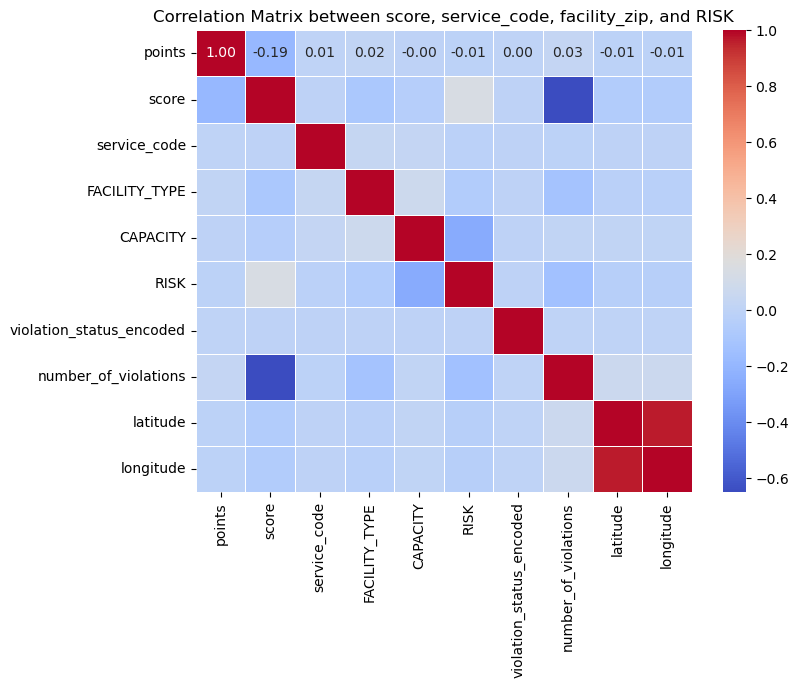

Numeric columns: Index(['points', 'score', 'service_code', 'FACILITY_TYPE', 'CAPACITY', 'RISK',
       'violation_status_encoded', 'number_of_violations', 'latitude',
       'longitude'],
      dtype='object')


In [111]:
# Check which columns are numeric
numeric_columns = merged_df.select_dtypes(include='number').columns

# Calculate the correlation matrix only for numeric columns
correlation_matrix = merged_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between score, service_code, facility_zip, and RISK')
plt.show()

# Print the numeric columns
print("Numeric columns:", numeric_columns)

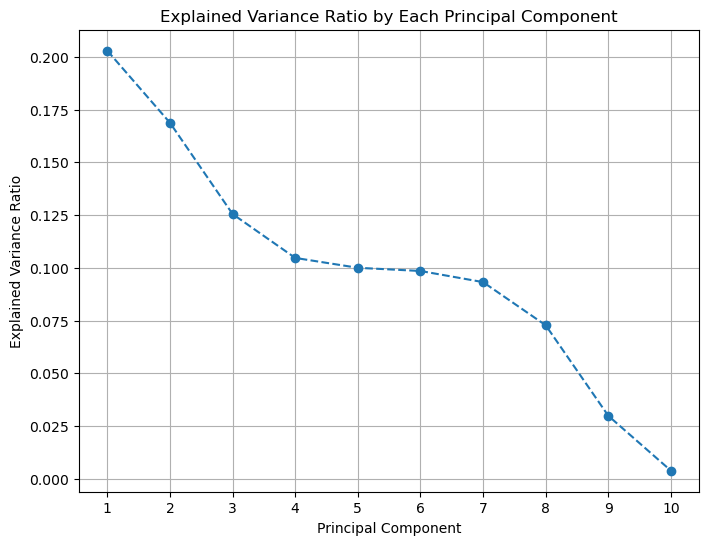

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Create a copy of the merged_df dataframe
merged_df_copy = merged_df.copy()

# Step 2: Select only the numeric columns for PCA (exclude non-numeric columns like 'facility_zip')
numeric_columns = merged_df_copy.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Standardize the data (PCA is sensitive to the scale of the data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df_copy[numeric_columns])

# Step 4: Apply PCA to the scaled data
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Step 5: Plot the explained variance ratio for each component (scree plot)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


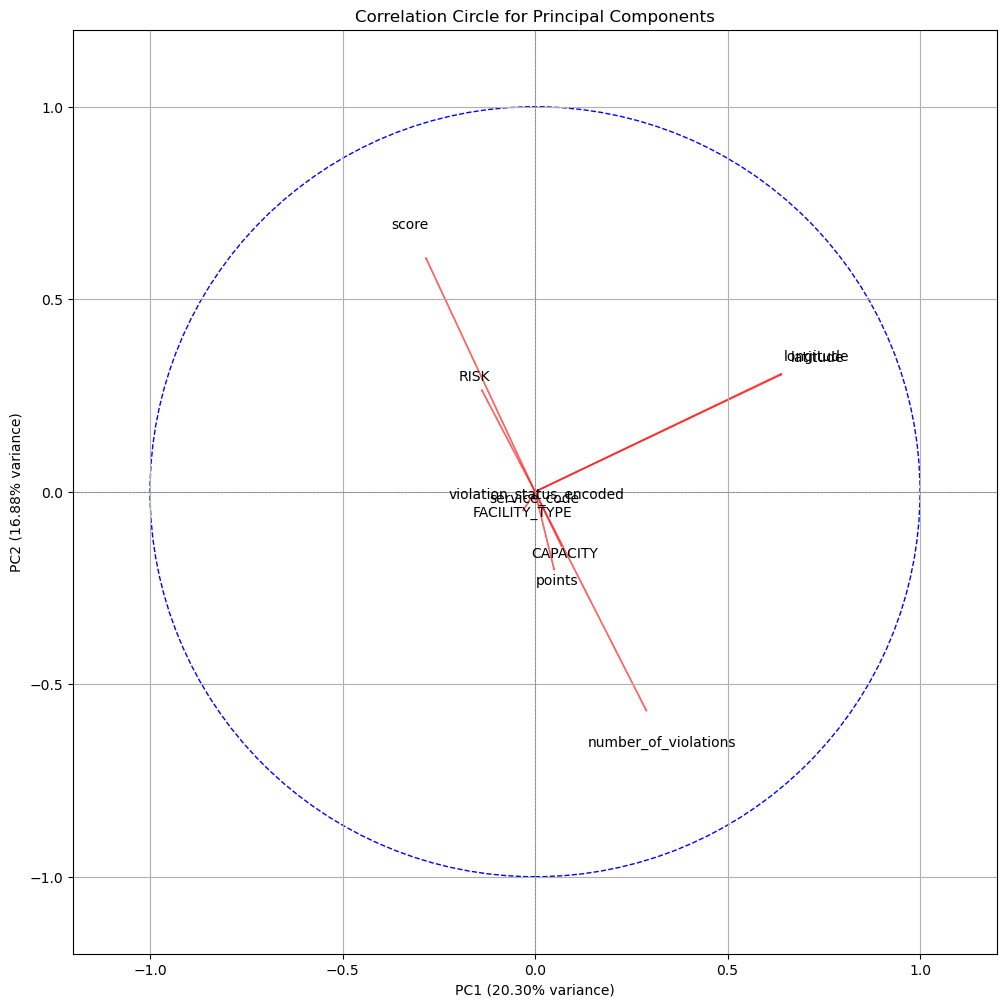

In [113]:


# Step 4: apply aco with numbar of comps 2
pca = PCA(n_components=2)
pca.fit(scaled_data)
loadings = pca.components_.T  # Transpose to align features with components

# Step 5: Plot the correlation circle
plt.figure(figsize=(12, 12))
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Plot the vectors for each feature
for i, feature in enumerate(numeric_columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='black', ha='center', va='center')

# Set axis limits
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# Add labels, title, and grid
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.title('Correlation Circle for Principal Components')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# CLASSIFICATION ATTEMPT based on GEOSPATIAL DATA :

what i'll do is i'll get restaurant state nbr of violations and its zip and it will classify and predict grade

DATASET SAN FRANCISO (state CA)

In [114]:

# Read the Excel file
SF = pd.read_excel('SANFRANCISO CA (can numberviola _ need to get grade from score _ has lat lon ).xlsx')

# Keep only the relevant columns: 'business_id', 'zipcode', 'score', 'date'
SF = SF[['business_id', 'zipcode', 'score', 'date']]

# Group by 'business_id' and 'date' to count the number of rows (violations)
violation_counts = SF.groupby(['business_id', 'date']).size().reset_index(name='nbrviolations')

# Merge the 'nbrviolations' count back into the original DataFrame
SF = pd.merge(SF, violation_counts, on=['business_id', 'date'], how='left')
"""

# Find the smallest score for each group (business_id, date)
min_scores = SF.groupby(['business_id', 'date'])['score'].min().reset_index(name='min_score')

# Merge the minimum score back into the original DataFrame
SF = pd.merge(SF, min_scores, on=['business_id', 'date'], how='left')

# Replace the 'score' column with the minimum score for each group
SF['score'] = SF['min_score']

# Drop the 'min_score' column as it's no longer needed
SF.drop(columns=['min_score'], inplace=True)
"""

"\n\n# Find the smallest score for each group (business_id, date)\nmin_scores = SF.groupby(['business_id', 'date'])['score'].min().reset_index(name='min_score')\n\n# Merge the minimum score back into the original DataFrame\nSF = pd.merge(SF, min_scores, on=['business_id', 'date'], how='left')\n\n# Replace the 'score' column with the minimum score for each group\nSF['score'] = SF['min_score']\n\n# Drop the 'min_score' column as it's no longer needed\nSF.drop(columns=['min_score'], inplace=True)\n"

In [115]:
print(SF.shape[0])

7137


In [116]:
#SF = SF.drop_duplicates()


In [117]:
print(SF.head())


   business_id  zipcode  score      date  nbrviolations
0           10    94104     92  20140729              6
1           10    94104     94  20140729              6
2           10    94104     82  20140729              6
3           10    94104     92  20140729              6
4           10    94104     94  20140729              6


In [118]:
#check for duplicate rows
SF.duplicated().sum()
SF.isnull().sum()

business_id      0
zipcode          0
score            0
date             0
nbrviolations    0
dtype: int64

In [119]:
def get_grade(score):
    if 90 <= score <= 100:
        return 'A'
    elif 80 <= score <= 89:
        return 'B'
    elif 64 <= score <= 79:
        return 'C'
    else:
        return 'F'  # Optional, for scores below 64, you can return 'F' or something else.

# Apply the function to create the 'grade' column
SF['grade'] = SF['score'].apply(get_grade)

# Now df contains the 'nbrviolations' and 'grade' columns
print(SF.head())

   business_id  zipcode  score      date  nbrviolations grade
0           10    94104     92  20140729              6     A
1           10    94104     94  20140729              6     A
2           10    94104     82  20140729              6     B
3           10    94104     92  20140729              6     A
4           10    94104     94  20140729              6     A


In [120]:
SF['STATE'] = 'CA'

# Now df_other will have the new column with 'NV' for all rows
print(SF.head())

   business_id  zipcode  score      date  nbrviolations grade STATE
0           10    94104     92  20140729              6     A    CA
1           10    94104     94  20140729              6     A    CA
2           10    94104     82  20140729              6     B    CA
3           10    94104     92  20140729              6     A    CA
4           10    94104     94  20140729              6     A    CA


In [121]:
SF = SF[['nbrviolations', 'grade', 'zipcode','STATE']]
SF.head()


,nbrviolations,grade,zipcode,STATE
0,6,A,94104,CA
1,6,A,94104,CA
2,6,B,94104,CA
3,6,A,94104,CA
4,6,A,94104,CA


In [122]:
SF = SF.rename(columns={
    'nbrviolations': 'number_of_violations',
    'grade': 'grade',
    'zipcode': 'facility_zip',
    'STATE': 'STATE'  # If you want to change this too, you can provide a new name
})
SF.head()


,number_of_violations,grade,facility_zip,STATE
0,6,A,94104,CA
1,6,A,94104,CA
2,6,B,94104,CA
3,6,A,94104,CA
4,6,A,94104,CA


In [123]:
print(SF.shape[0])

7137


DATASET NEVADA

In [124]:
NV = pd.read_csv('NEVADA ( can numberviola (violations_row) _ already has grade _ has lat lon ) .csv')
NV.head()


,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,...,2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


In [125]:
print(NV.shape[0])


15673


In [126]:
print(NV['ZIP'].isna().sum())

59


In [127]:
# Select only the relevant columns and create a copy to avoid "SettingWithCopyWarning"
NV = NV[['NUMBER_OF_VIOLATIONS', 'CURRENT_GRADE', 'ZIP']].copy()

# Convert 'NUMBER_OF_VIOLATIONS' and 'ZIP' to numeric, forcing errors to NaN
NV['NUMBER_OF_VIOLATIONS'] = pd.to_numeric(NV['NUMBER_OF_VIOLATIONS'], errors='coerce')
NV['ZIP'] = pd.to_numeric(NV['ZIP'], errors='coerce')

# Impute 'NUMBER_OF_VIOLATIONS' with 3 if it's NaN
NV['NUMBER_OF_VIOLATIONS'] = NV['NUMBER_OF_VIOLATIONS'].fillna(3)

# Impute 'CURRENT_GRADE' with the most frequent value (mode)
NV['CURRENT_GRADE'] = NV['CURRENT_GRADE'].fillna(NV['CURRENT_GRADE'].mode()[0])

# Impute 'ZIP' with the most frequent ZIP (mode)
NV['ZIP'] = NV['ZIP'].fillna(NV['ZIP'].mode()[0])

# Now, we will remove rows based on the least frequent `CURRENT_GRADE`
# Find the frequency of each grade
grade_counts = NV['CURRENT_GRADE'].value_counts()

# Determine the grades that are least frequent (you can adjust this threshold as needed)
least_frequent_grades = grade_counts[grade_counts == grade_counts.min()].index

# Drop rows where the grade is one of the least frequent grades
NV = NV[~NV['CURRENT_GRADE'].isin(least_frequent_grades)]

# Print the first few rows to verify
print(NV.head())

   NUMBER_OF_VIOLATIONS CURRENT_GRADE      ZIP
0                   4.0             A  89109.0
1                   5.0             A  89109.0
2                   3.0             A  89109.0
3                   3.0             A  89109.0
4                   3.0             A  89109.0


In [128]:
# Add a new column named 'new_column' with the value 'NV' for all rows
NV['STATE'] = 'NV'

# Now df_other will have the new column with 'NV' for all rows
print(NV.head())


   NUMBER_OF_VIOLATIONS CURRENT_GRADE      ZIP STATE
0                   4.0             A  89109.0    NV
1                   5.0             A  89109.0    NV
2                   3.0             A  89109.0    NV
3                   3.0             A  89109.0    NV
4                   3.0             A  89109.0    NV


In [129]:
#NV = NV.drop_duplicates()
print(NV.head())



   NUMBER_OF_VIOLATIONS CURRENT_GRADE      ZIP STATE
0                   4.0             A  89109.0    NV
1                   5.0             A  89109.0    NV
2                   3.0             A  89109.0    NV
3                   3.0             A  89109.0    NV
4                   3.0             A  89109.0    NV


In [130]:
NV = NV.rename(columns={
    'NUMBER_OF_VIOLATIONS': 'number_of_violations',
    'CURRENT_GRADE': 'grade',
    'ZIP': 'facility_zip',
    'STATE': 'STATE'  # If you want to change this too, you can provide a new name
})
NV.head()


,number_of_violations,grade,facility_zip,STATE
0,4.0,A,89109.0,NV
1,5.0,A,89109.0,NV
2,3.0,A,89109.0,NV
3,3.0,A,89109.0,NV
4,3.0,A,89109.0,NV


In [131]:
print(NV.shape[0])

15657


Dataset Poverty Percentage :

In [132]:
POV = pd.read_csv('poverty by state (used to get state poverty rate).csv')
POV.head()


,State,state_code,official_population,official_margin_of_error,official_percent_estimate,official_percent_estimate_margin_of_error,spm_population,spm_margin_of_error,spm_percent_estimate,spm_percent_estimate_margin_of_error
0,Alabama,AL,726000,90000,14.6,1.8,513000,92000,10.3,1.9
1,Alaska,AK,83000,10000,11.7,1.4,70000,8000,9.8,1.1
2,Arizona,AZ,806000,92000,11.2,1.3,646000,97000,9.0,1.4
3,Arkansas,AR,447000,41000,15.1,1.3,287000,29000,9.7,1.0
4,California,CA,4323000,205000,11.0,0.5,5160000,214000,13.2,0.5


In [133]:
POV = POV[['state_code', 'official_percent_estimate']]


In [134]:
POV.head()


,state_code,official_percent_estimate
0,AL,14.6
1,AK,11.7
2,AZ,11.2
3,AR,15.1
4,CA,11.0


DATASET OG MERGED DF

In [135]:
OGCA=merged_df.copy()

OGCA.head()

,serial_number,activity_date,facility_name,violation_code,violation_status,points,grade,facility_address,facility_id,facility_zip,score,service_code,FACILITY_TYPE,CAPACITY,RISK,violation_status_encoded,number_of_violations,neighborhood,latitude,longitude
0,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F037,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033
1,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F007,OUT OF COMPLIANCE,2,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033
2,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F033,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033
3,DAGALNRCJ,10/30/2017 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F040,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,4,Brentwood,34.06626,-118.47033
4,DARVEEBAV,12/12/2016 12:00:00 AM,CHIPOTLE MEXICAN GRILL,F035,OUT OF COMPLIANCE,1,A,11690 W SAN VICENTE BLVD,FA0059741,90049,95,1,4.0,6.0,0.0,2.0,5,Brentwood,34.06626,-118.47033


In [136]:
print(OGCA.shape[0])


455601


In [137]:
OGCA = OGCA[['activity_date','number_of_violations', 'grade', 'facility_zip']]

In [138]:
OGCA.head()

,activity_date,number_of_violations,grade,facility_zip
0,10/30/2017 12:00:00 AM,4,A,90049
1,10/30/2017 12:00:00 AM,4,A,90049
2,10/30/2017 12:00:00 AM,4,A,90049
3,10/30/2017 12:00:00 AM,4,A,90049
4,12/12/2016 12:00:00 AM,5,A,90049


In [139]:
# Make sure OGCA is a copy of the DataFrame to avoid SettingWithCopyWarning
OGCA = OGCA.drop_duplicates().copy()

# Now assign the 'STATE' column
OGCA['STATE'] = 'CA'

OGCA = OGCA[['number_of_violations', 'grade', 'facility_zip', 'STATE']]
# Check the result
OGCA.head()


,number_of_violations,grade,facility_zip,STATE
0,4,A,90049,CA
4,5,A,90049,CA
9,4,A,90049,CA
13,6,A,90049,CA
19,5,A,90049,CA


In [140]:
print(OGCA.shape[0])

53724


DATASET NEW YORK

In [141]:
NY = pd.read_csv('NY (can numberofviola _ already has grade _ no lat lon only zip) .csv')
NY.head()


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [142]:
violation_counts = NY.groupby(['DBA', 'RECORD DATE']).size().reset_index(name='NUMBER_OF_VIOLATIONS')
NY = pd.merge(NY, violation_counts, on=['DBA', 'RECORD DATE'], how='left')
# Step 3: Now 'NY' contains the 'NUMBER_OF_VIOLATIONS' column for each row
NY.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,NUMBER_OF_VIOLATIONS
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,38.0
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection,38.0
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,5.0
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,7.0
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,14.0


In [143]:
NY = NY[['NUMBER_OF_VIOLATIONS', 'GRADE', 'ZIPCODE']]
NY = NY.drop_duplicates()

# Step 8: Drop rows where 'NUMBER_OF_VIOLATIONS', 'GRADE', or 'ZIPCODE' columns are null
NY = NY.dropna(subset=['NUMBER_OF_VIOLATIONS', 'GRADE', 'ZIPCODE'])
NY['STATE'] = 'NY'

NY.head()


,NUMBER_OF_VIOLATIONS,GRADE,ZIPCODE,STATE
6,24.0,C,11215.0,NY
7,29.0,A,10304.0,NY
9,40.0,A,10012.0,NY
12,17.0,A,11215.0,NY
13,25.0,A,11211.0,NY


In [144]:
NY = NY.rename(columns={
    'NUMBER_OF_VIOLATIONS': 'number_of_violations',
    'GRADE': 'grade',
    'ZIPCODE': 'facility_zip',
    'STATE': 'STATE'  # If you want to change this too, you can provide a new name
})

In [145]:
NY.head()


,number_of_violations,grade,facility_zip,STATE
6,24.0,C,11215.0,NY
7,29.0,A,10304.0,NY
9,40.0,A,10012.0,NY
12,17.0,A,11215.0,NY
13,25.0,A,11211.0,NY


In [146]:
print(NY.shape[0])

16086


Merging :

In [147]:
# Concatenate all the dataframes into one
MergeforClass = pd.concat([OGCA, NY, NV, SF], ignore_index=True)

# Final output
MergeforClass.head()


,number_of_violations,grade,facility_zip,STATE
0,4.0,A,90049,CA
1,5.0,A,90049,CA
2,4.0,A,90049,CA
3,6.0,A,90049,CA
4,5.0,A,90049,CA


In [148]:
print(MergeforClass['STATE'].unique())


['CA' 'NY' 'NV']


In [149]:
print(MergeforClass.shape[0])

92604


In [150]:
merged_with_poverty = pd.merge(MergeforClass, POV, left_on='STATE', right_on='state_code', how='left')

# Step 2: Rename the 'official_percent_estimate' column to 'poverty_percent'
merged_with_poverty = merged_with_poverty.rename(columns={'official_percent_estimate': 'poverty_percent'})
merged_with_poverty = merged_with_poverty[['number_of_violations', 'grade', 'facility_zip','STATE','poverty_percent']]

merged_with_poverty.head()


,number_of_violations,grade,facility_zip,STATE,poverty_percent
0,4.0,A,90049,CA,11.0
1,5.0,A,90049,CA,11.0
2,4.0,A,90049,CA,11.0
3,6.0,A,90049,CA,11.0
4,5.0,A,90049,CA,11.0


In [151]:

def clean_grade(grade):
    # Convert the grade to a string (in case it's not already)
    grade = str(grade)

    # If the grade contains 'A', replace with 'A'
    if 'A' in grade.upper():
        return 'A'

    # If the grade contains 'C', replace with 'C'
    elif 'C' in grade.upper():
        return 'C'

    # For any other values, replace with 'B' (the mean grade)
    else:
        return 'B'

# Apply the function to the 'grade' column
merged_with_poverty['grade'] = merged_with_poverty['grade'].apply(clean_grade)

# Check the unique values after replacement
print(merged_with_poverty['grade'].unique())

['A' 'B' 'C']


In [152]:
grade_mapping = {'A': 0, 'B': 1, 'C': 2}

state_mapping = {'CA': 0, 'NY': 1, 'NV': 2}

# Apply the mapping to the 'STATE' column
merged_with_poverty['STATE'] = merged_with_poverty['STATE'].map(state_mapping)
merged_with_poverty['grade'] = merged_with_poverty['grade'].map(grade_mapping)

# Step 1: Convert 'facility_zip' to string type (ensure all values are treated as strings)
merged_with_poverty['facility_zip'] = merged_with_poverty['facility_zip'].astype(str)

# Step 2: Extract the numeric part of the zip code (if it contains a hyphen)
merged_with_poverty['facility_zip'] = merged_with_poverty['facility_zip'].str.split('-').str[0]

# Step 3: Convert the extracted zip code to a numeric type (int or float)
merged_with_poverty['facility_zip'] = pd.to_numeric(merged_with_poverty['facility_zip'], errors='coerce')

# If you want to convert to integers (e.g., for Zip code)
merged_with_poverty['facility_zip'] = merged_with_poverty['facility_zip'].astype('Int64')

# Step 4: Drop rows where any column has NaN (after conversion)
merged_with_poverty = merged_with_poverty.dropna()

# Final output
print(merged_with_poverty.head())


   number_of_violations  grade  facility_zip  STATE  poverty_percent
0                   4.0      0         90049      0             11.0
1                   5.0      0         90049      0             11.0
2                   4.0      0         90049      0             11.0
3                   6.0      0         90049      0             11.0
4                   5.0      0         90049      0             11.0


In [153]:
# Convert the 'number_of_violations' column to integers
merged_with_poverty['number_of_violations'] = merged_with_poverty['number_of_violations'].astype('Int64')

# Verify the conversion
print(merged_with_poverty['number_of_violations'].unique())

<IntegerArray>
[  4,   5,   6,   3,   7,   8,   9,   2,   1,  10,
 ...
 134,  93,  76, 225, 211, 215, 123, 148, 115, 104]
Length: 190, dtype: Int64


In [154]:
# Filter rows where 'number_of_violations' is 'Nevada'
rows_with_nevada = merged_with_poverty[merged_with_poverty['number_of_violations'] == 'Nevada']

# Print the rows
print(rows_with_nevada)
# Remove rows where 'number_of_violations' is 'Nevada'
merged_with_poverty = merged_with_poverty[merged_with_poverty['number_of_violations'] != 'Nevada']

# Verify that the rows were removed
print(merged_with_poverty['number_of_violations'].unique())


Empty DataFrame
Columns: [number_of_violations, grade, facility_zip, STATE, poverty_percent]
Index: []
<IntegerArray>
[  4,   5,   6,   3,   7,   8,   9,   2,   1,  10,
 ...
 134,  93,  76, 225, 211, 215, 123, 148, 115, 104]
Length: 190, dtype: Int64


In [155]:
print(merged_with_poverty.shape[0])

92604


In [156]:
#stoph

# KNN STEP

In [157]:
merged_with_poverty.head()

,number_of_violations,grade,facility_zip,STATE,poverty_percent
0,4,0,90049,0,11.0
1,5,0,90049,0,11.0
2,4,0,90049,0,11.0
3,6,0,90049,0,11.0
4,5,0,90049,0,11.0


In [158]:
merged_with_poverty['grade'] = merged_with_poverty['grade'].replace({2: 1})

print(merged_with_poverty['grade'].unique())

[0 1]


In [159]:
print(merged_with_poverty['STATE'].unique())

[0 1 2]


1- defining el feature and our target

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


X = merged_with_poverty[['number_of_violations', 'facility_zip', 'STATE', 'poverty_percent']]
y = merged_with_poverty['grade']


splitting data into train and test

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [162]:
print(y_train.head())


24563    0
37035    0
15513    0
32603    0
3295     0
Name: grade, dtype: int64


nitialize and Train k-NN Classifier

In [163]:
k = 19  # Start with 5 neighbors, adjust as needed
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=19)

In [164]:
y_pred = knn.predict(X_test)


In [165]:
print(y_pred)

[0 0 0 ... 0 0 1]


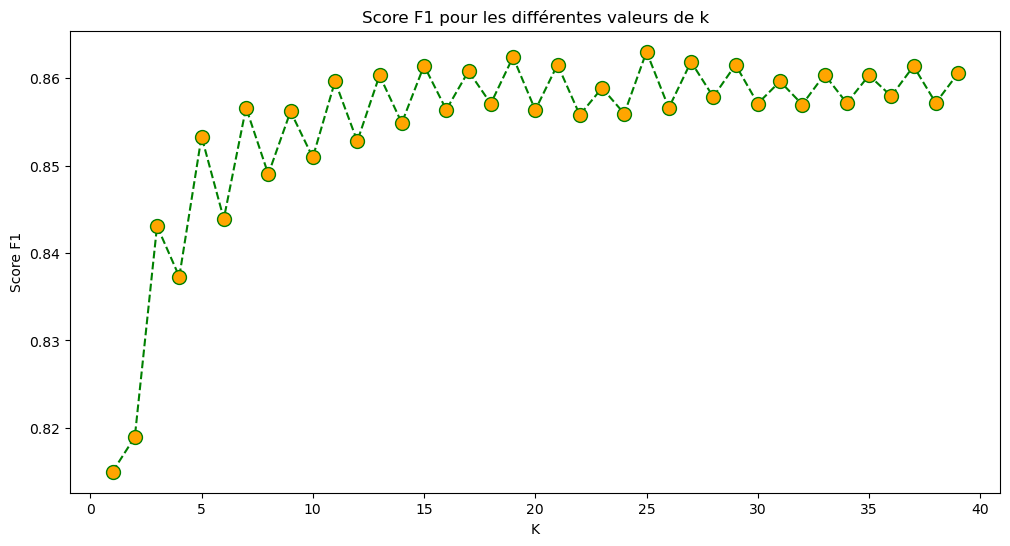

In [166]:
from sklearn.metrics import f1_score
# Initialiser une liste pour stocker les scores F1
f1_scores = []

# Calculer le F1 Score pour k entre 1 et 40
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)

    # Calculer le F1 Score et l'ajouter à la liste
    f1 = f1_score(y_test, pred_i, average='weighted')  # Vous pouvez choisir l'option 'micro', 'macro', ou 'weighted'
    f1_scores.append(f1)

# Tracer le graphique avec les scores F1
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1_scores, color='green', linestyle='dashed', marker='o', markerfacecolor='orange', markersize=10)
plt.title('Score F1 pour les différentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Score F1')
plt.show()

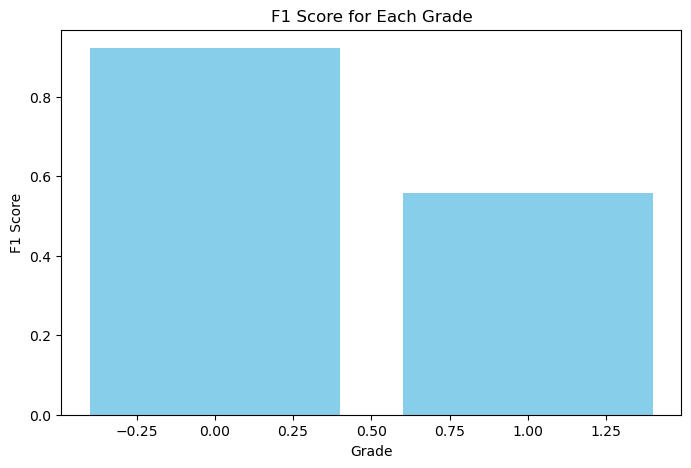

In [167]:
# Calculate F1 scores for each class
f1_scores = f1_score(y_test, y_pred, average=None, labels=knn.classes_)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(knn.classes_, f1_scores, color='skyblue')
plt.xlabel('Grade')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Grade')
plt.show()


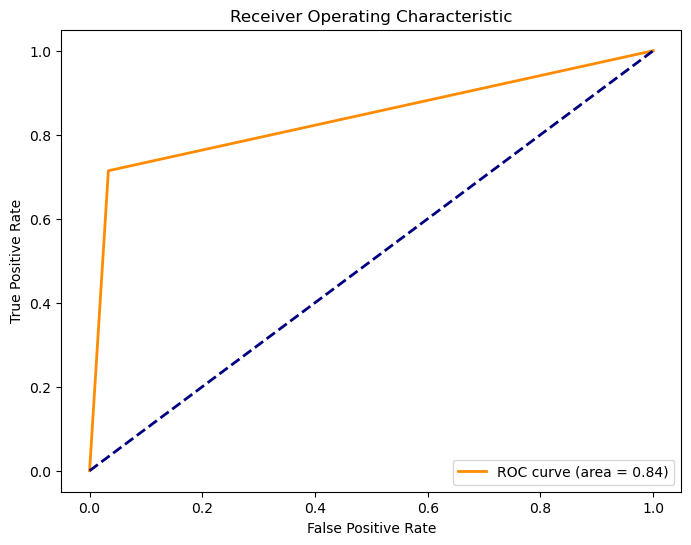

In [170]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [168]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8685816100642514
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     15456
           1       0.63      0.50      0.56      3065

    accuracy                           0.87     18521
   macro avg       0.77      0.72      0.74     18521
weighted avg       0.86      0.87      0.86     18521



# Trying out SVM

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classes = y.unique()
class_weights = compute_class_weight('balanced', classes=classes, y=y)
class_weights_dict = dict(zip(classes, class_weights))
print(f"Class Weights: {class_weights_dict}")



Class Weights: {0: 0.5968060013147211, 1: 3.0824845216696626}


In [ ]:

svm = SVC(kernel='rbf', class_weight=class_weights_dict, random_state=42)

svm.fit(X_train, y_train)


SVC(class_weight={0: 0.5968060013147211, 1: 3.0824845216696626},
    random_state=42)

In [ ]:

y_pred_svc1 = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svc1)


In [ ]:
print(f"Accuracy: {accuracy}")


Accuracy: 0.7883483613195832


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svc1))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     15396
           1       0.43      0.74      0.54      3125

    accuracy                           0.79     18521
   macro avg       0.68      0.77      0.70     18521
weighted avg       0.85      0.79      0.81     18521



# Linear

In [ ]:
svmlinear = SVC(kernel='linear')
svmlinear.fit(X_train, y_train)
y_pred_svc_3 = svmlinear.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_svc_3))


In [ ]:
print(classification_report(y_pred_svc_3, y_test))

# Poly

In [ ]:
svmpoly = SVC(kernel='poly')
svmpoly.fit(X_train, y_train)
y_pred_svc_2 = svmpoly.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_svc_2))


In [ ]:
print(classification_report(y_pred_svc_2, y_test))

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Evaluate the best model
print(f"Best Parameters: {grid.best_params_}")
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

# Final evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.4min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.4min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.0min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.0min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.9min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 2.9min
[CV] END ......................C=0.1, gamma=0.01

KeyboardInterrupt: 